In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import os
import json
import re

# read data from csv file

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = '~/Desktop/SummerQuarterDS/Capstone/fake.csv'
df = pd.read_csv(file)

In [4]:
# unqiue types 
u_type = df['type'].unique()
print(len(u_type))

8


In [5]:
# count in each type 
count_type = df['type'].value_counts()
print(count_type)

bs            11492
bias            443
conspiracy      430
hate            246
satire          146
state           121
junksci         102
fake             19
Name: type, dtype: int64


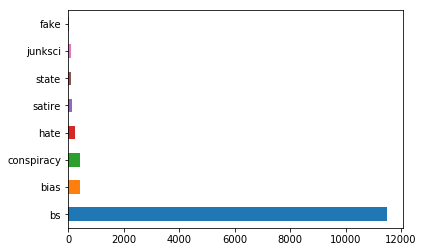

In [6]:
# draw the count result
count_type.plot(kind='barh')

# which website has fake news

In [7]:
fake_news_df = df[df['type'] != 'bs']
fake_news_website = fake_news_df['site_url'].unique()

In [8]:
fake_news_df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [9]:
fake_news_website = fake_news_website.tolist()

In [10]:
print(type(fake_news_website))
print(len(fake_news_website))

<class 'list'>
27


In [11]:
# get the fake news website and title of these fake news
fake_news_title = fake_news_df[['text']]

In [12]:
fake_news_title.head()
print(len(fake_news_title))

1507


# add news content into a list 

In [13]:
fake_news_content_from_csv = fake_news_title['text'].tolist()


In [14]:
print(fake_news_content_from_csv[0])

Print They should pay all the back all the money plus interest. The entire family and everyone who came in with them need to be deported asap. Why did it take two years to bust them? 
Here we go again …another group stealing from the government and taxpayers! A group of Somalis stole over four million in government benefits over just 10 months! 
We’ve reported on numerous cases like this one where the Muslim refugees/immigrants commit fraud by scamming our system…It’s way out of control! More Related


In [15]:
fake_news_content_from_csv_str = []
for i in range(0,len(fake_news_content_from_csv)):
    #print(type(fake_news_content_from_csv[i]))
    if(isinstance(fake_news_content_from_csv[i], str)):
        fake_news_content_from_csv_str.append(fake_news_content_from_csv[i])
    

In [16]:
a = fake_news_content_from_csv[1111]
new_content_token_csv = re.sub(r'[^\w]', ' ', a).lower().split()

In [17]:
print(new_content_token_csv) #some of the news_content_token_csv is float type

['breitbart', 'october', '26', '2016', 'a', 'syrian', 'christian', 'mother', 'shared', 'her', 'story', 'of', 'escaping', 'the', 'islamic', 'state', 'terrorist', 'group', 'in', 'a', 'suburb', 'of', 'damascus', 'while', 'losing', 'her', 'son', 'george', 'after', 'he', 'refused', 'to', 'identify', 'himself', 'to', 'the', 'terrorists', 'by', 'a', 'muslim', 'name', 'the', 'woman', 'alice', 'assaf', 'said', 'that', 'she', 'had', 'heard', 'that', 'her', 'son', 'who', 'was', 'beaten', 'and', 'shot', 'to', 'death', 'was', 'spared', 'a', 'much', 'worse', 'fate', 'being', 'baked', 'in', 'the', 'ovens', 'of', 'the', 'local', 'bakery', 'or', 'kneaded', 'to', 'death', 'in', 'the', 'bakery', 's', 'industrial', 'sized', 'mixer', 'assaf', 'told', 'her', 'story', 'to', 'roads', 'of', 'success', 'a', 'human', 'rights', 'ngo', 'with', 'a', 'focus', 'on', 'the', 'rights', 'of', 'women', 'and', 'christians', 'in', 'the', 'middle', 'east', 'the', 'group', 'has', 'provided', 'testimony', 'of', 'the', 'plight'

In [18]:
# clean the data
news_content_all_csv= []
for i in range (0,len(fake_news_content_from_csv_str)):
    new_content_token_csv = re.sub(r'[^\w]', ' ', fake_news_content_from_csv_str[i]).lower().split()
    new_content_token_csv = [ word for word in new_content_token_csv if word not in stopwords.words('english')]
    news_content_all_csv.append(new_content_token_csv)


In [19]:
print(type(fake_news_content_from_csv))
print(len(fake_news_content_from_csv))
print(type(fake_news_content_from_csv[0]))

<class 'list'>
1507
<class 'str'>


# extract news content from csv files

In [54]:
print(news_content_all_csv[0])
print(news_content_all_csv[1333])

['print', 'pay', 'back', 'money', 'plus', 'interest', 'entire', 'family', 'everyone', 'came', 'need', 'deported', 'asap', 'take', 'two', 'years', 'bust', 'go', 'another', 'group', 'stealing', 'government', 'taxpayers', 'group', 'somalis', 'stole', 'four', 'million', 'government', 'benefits', '10', 'months', 'reported', 'numerous', 'cases', 'like', 'one', 'muslim', 'refugees', 'immigrants', 'commit', 'fraud', 'scamming', 'system', 'way', 'control', 'related']
['josh', 'stop', 'talking', 'sit', 'american', 'people', 'fed', 'spewing', 'lies', 'coming', 'administration', 'destruction', 'country', 'come', 'end', 'people', 'spoken', 'time', 'change', 'long', 'time', 'coming', 'trump', 'would', 'say', 'time', 'drain', 'swamp']


In [55]:
# change to a list of string
news_content_string_csv = [' '.join(x) for x in news_content_all_csv]

In [58]:
print(news_content_string_csv[0:2])

['print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related', 'attorney general loretta lynch plead fifth barracuda brigade 2016 10 28 print administration blocking congressional probe cash payments iran course needs plead 5th either recall refuses answer plain deflects question straight corruption finest 100percentfedup com talk covering ass loretta lynch plead fifth avoid incriminating payments iran corrupt core attorney general loretta lynch declining comply investigation leading members congress obama administration secret efforts send iran 1 7 billion cash earlier year prompting accusations lynch pleaded fifth amendment avoid incriminating payments according lawmakers communications exclusively obtained washington free bea

# label the news from csv files, all news are fake

In [104]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y_csv = [1] * len(news_content_string_csv)

# one hot encode the output variable
news_Y_csv = np.array (fake_y_csv)
print(type(news_Y_csv))

<class 'numpy.ndarray'>


In [105]:
print(news_Y_csv.shape)

(1461,)


# read all json files from different folder

In [100]:
# read real
myList = []
directory = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/BuzzFeed/FakeNewsContent'
file_names = os.listdir(directory)
cleaned_file_name = [f for f in file_names if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name:   
    with open(os.path.join(directory,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList.append(data)
        
# read fake
myList_real = []
my_df_real  = pd.DataFrame()
directory_real = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/BuzzFeed/RealNewsContent'
file_names_real = os.listdir(directory_real)
cleaned_file_name_real = [f for f in file_names_real if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real:   
    with open(os.path.join(directory_real,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real.append(data)
        
# read fake news
myList_fake = []
my_df  = pd.DataFrame()
directory_fake = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/PolitiFact/FakeNewsContent'
file_names_fake = os.listdir(directory_fake)
cleaned_file_name_fake = [f for f in file_names_fake if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_fake:   
    with open(os.path.join(directory_fake,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_fake.append(data)
        
# read good news
myList_real_p = []
directory_real_p = '/Users/moranwang/Desktop/SummerQuarterDS/Capstone/FakeNewsNet/Data/PolitiFact/RealNewsContent'
file_names_real_p = os.listdir(directory_real_p)
cleaned_file_name_real_p = [f for f in file_names_real_p if f.endswith('.json')]
#for i, filename in zip(range(1),cleaned_file_name):
for filename in cleaned_file_name_real_p:   
    with open(os.path.join(directory_real_p,filename),'r',encoding="utf8") as myfile:
        #print(filename)
        data = json.load(myfile) 
        myList_real_p.append(data)

# append all file together (fake and real) from both json file

In [101]:
news_list = myList + myList_fake + myList_real + myList_real_p 

In [28]:
print(len(news_list))

422


# extract news content from json file

['print', 'pay', 'back', 'money', 'plus', 'interest', 'entire', 'family', 'everyone', 'came', 'need', 'deported', 'asap', 'take', 'two', 'years', 'bust', 'go', 'another', 'group', 'stealing', 'government', 'taxpayers', 'group', 'somalis', 'stole', 'four', 'million', 'government', 'benefits', '10', 'months', 'reported', 'numerous', 'cases', 'like', 'one', 'muslim', 'refugees', 'immigrants', 'commit', 'fraud', 'scamming', 'system', 'way', 'control', 'related']
{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/Hillary-earpiece.jpg', 'text': "People Noticed Something Odd About Hillary’s Outfit at the Debate Last Night\n\nThere’s a lot that could be discussed about last night’s debate, like the unfair debate moderator asking questions to help Hillary, but that’s not the main concern right now.\n\nThere is one thing that has baffled many…. Hillary didn’t appear to be her usually stupid coughing self! She was so ready with answers and detailed facts. Almost just as bizarre was 

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/soros-trump.jpg', 'text': "EXPOSED: Soros Funding Fake Veterans’ PAC To Take Trump Down\n\nA couple months ago, Discover the Networks revealed a list of 187 groups who were funded by Soros. They have naturally been attacking the presidential candidate who is generally against their values like open borders, amnesty, giving illegals voting rights, Muslim migration and social justice. So, WHY then is Soros caught again?\n\nNow a new organization is going after Trump and sure enough, they’re funded by Soros TOO! It’s called ‘Common Defense PAC’ and their mantra is: “As veterans, we swore to protect the rights of every American. We continue to fulfill this promise by standing against Donald Trump.”\n\nThen on the ‘leadership team’ page on the website it lists a bunch of military veterans with no contact information for them. On their social media you see the same stuff. They feature videos and materials from other PACs that a

{'top_img': 'http://occupydemocrats.com/wp-content/uploads/charlotte-riot-police-shoot-protester-contradict-witnesses.jpg', 'text': "7k SHARES SHARE THIS STORY\n\nLast night, the city of Charlotte was rocked with protests for a second straight night as massive crowds protested the police killing of Kenneth L. Scott. During the protests, a civilian was shot in the head and critically injured. The police quickly told the media that the shooter was also a civilian, but a number of eyewitness reports seem to indicate that the police are lying – and that the shot came from law enforcement.\n\nOne key eye witness report emerged from Charlotte on Twitter, along with a graphic photo of the bloody aftermath and a haunting statement from Todd Zimmer, who claims to have assisted in the emergency response: “I didn’t want to post about this, but my city is lying about what happened tonight. Let the record show.”\n\nMy friend @neutralized was on the ground in Charlotte. He saw the shooting. Here's h

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/trump-hillary-e1474296026161.jpg', 'text': 'CNN FURIOUS and Embarrassed After Trump Called Them Out For One Major Thing\n\nThis weekend, a bombing in New York City rocked the nation as Americans everywhere wondered if we were under attack again. Donald Trump responded to the attack almost immediately, accurately describing it as a “bombing/” CNN, for some inexplicable reason, criticized him for that — even though Hillary Clinton described the attack the exact same way. So CNN edited out Hillary’s wording. And Donald Trump just ripped them a new one for it.\n\nIn the CNN footage, they only showed Clinton responding to a question from a reporter, where she agreed that Trump was “insensitive” for calling the Chelsea bombing a “bombing.” Jake Tapper played the same footage a second time and again criticized Trump for jumping to conclusions. Both times, the network did not air Clinton’s own description of the attack as a bombi

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/GettyImages-605695152.jpg', 'text': 'I woke up this morning to find a variation of this headline splashed all over my news feed:\n\nBill Clinton: ‘Natural’ For Foundation Donors to Seek Favors\n\nHere’s Google:\n\nNaturally, my reaction was “oh, s**t, what did Bill Clinton do to damage his wife’s campaign now?”\n\nOf course, the headline sounds really, really awful. It plays right into the idea that the Clinton Foundation is all about pay to play, just like Donald Trump has been saying all along. Unfortunately, it takes reading beyond the headlines, which is something most people don’t do, to find out the real story – and the real story is that there is no pay to play.\n\n“It was natural for people who’ve been our political allies and personal friends to call and ask for things. And I trusted the State Department wouldn’t do anything they shouldn’t do,” Clinton told NPR in an interview that air

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/09/0059768001463454026_filepicker.jpg', 'text': '2.1k SHARES Facebook Twitter\n\nSeahawks Quarterback Russell Wilson has never shied away from sharing his love for God and his fellow man. In fact, it is one of his life’s purposes to serve and help his ‘brothers and sisters’ in changing lives to be better. Helping others to get on a path that leads to true joy is what he hopes becomes his legacy in life.\n\nOn the field he as a Quarterback, Wilson is all about winning. Off the field, he sets his focus on helping others to find the joy and peace that he feels himself through good choices and having hope and faith in God.\n\nFor this reason, it is no surprise that when the NFL told Wilson to not speak about his faith…he learned he could still share his love for God and message of hope, by his actions. Words were not necessary.\n\nHe has stated many times that in his life, God comes first, family and friends second, and football 

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/09/Hillary-vs-cop.jpg', 'text': '5.2k SHARES Facebook Twitter\n\nJason Falconer, the NRA-certified firearms instructor and off-duty police officer, who shot the ISIS terrorist who stabbed eight people in St. Cloud, Minnesota, is someone that Hillary Clinton wants to put out of business. In fact, it’s one of the primary things she intends to do first if she is elected president.\n\nThis is a brave man who saved countless lives by taking out a Jihadist. The same kind of Islamic refugee that Barack Obama and Hillary Clinton just love to death. Falconer owns Tactical Advantage Firearms Training, Inc. which is one of those businesses that Clinton just despises… because it has to do with guns, training people how to safely use weapons and is a protector and promoter of our Second Amendment rights. This is one of the biggest reasons not to ever vote for Hillary Clinton… EVER.\n\nFrom Bearing Arms:\n\nWe told you this morning how USP

{'title': 'Hillary Denies She and Obama Founded ISIS…Then This Video Shows Up', 'text': 'It was late one night in the White House when Obama first came up with the idea for ISIS. He hadn’t been sleeping well. Michelle told him to take some deep breaths, have some hot milk, and rewatch Princess Bride, but he’d made it all the way to the Billy Crystal scene, and he was out of milk, and Michelle had started snoring. The snoring was loud and nasty and kind of wet-sounding, like a broken boat was giving birth to another boat. He had to get out of there.\r\n\r\nFirst, he headed down to the Oval Office and tried to sleep on the couch, but it wasn’t long enough for his legs, and it smelled like generals’ butts. For a long time, he just wandered around the West Wing alone. He was sad and tired and had the nervous feeling that he was doing something he shouldn’t. He peeked into people’s desk drawers and found pictures of cats and dogs and babies. He was thinking about stealing a Kind bar off one
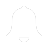

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/GettyImages-503594898.jpg', 'text': 'Someone had to say it. Okay, liberals have been saying it for years. Fox News (and increasingly, the other news channels) have been promoting fear for so long that they have become the terrorists. Pope Francis agrees. Channeling Franklin Delano Roosevelt’s infamous line, “we have nothing to fear but fear itself,” the Pope chastised fear-based media.\n\nJournalism based on gossip or rumors is a form of “terrorism” and media that stereotype entire populations or foment fear of migrants are acting destructively, Pope Francis said on Thursday. Spreading rumors is an example of “terrorism, of how you can kill a person with your tongue”, he said. “This is even more true for journalists because their voice can reach everyone and this is a very powerful weapon.” Source: Reuters\n\nNow, to be fair, Pope Francis was in Italy and he was talking to Italy’s press, which 

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/Untitled-1-Recovered-Recovered-Recovered-Recovered-4.jpg', 'text': 'Donald Trump is, well, deplorable. He’s suggested building a wall to keep invading hordes of brown-skinned “rapists” and “drug dealers” from charging into the country, gotten on board with creating a national registry for Muslims like Hitler did with the Jews, forcing said Muslims to wear special identification badges, and even rounding them up into modern-day concentration camps as a “temporary measure.” He’s even suggested outright murdering the families of terrorists abroad:\n\n“The other thing with the terrorists is you have to take out their families, when you get these terrorists, you have to take out their families. They care about their lives, don’t kid yourself. When they say they don’t care about their lives, you have to take out their families.”\n\nBut he’s not satisfied with slaughtering innocents to get to terroris

{'top_img': 'http://oppositionreport.com/wp-content/uploads/2016/09/GettyImages-599936028.jpg', 'text': '\n\nPosted by Frank Wilkenmeyer on 19 Sep 2016\n\nWe’ve all seen campaign promises go horribly wrong. One of the most famous is probably “read my lips…no new taxes,” a moment in time that won an election and lost the next after George HW Bush made the promise but signed the largest tax increase in the history of tax increases. What Donald Trump just promised as a reaction to the attacks over the weekend in Chelsea and Minnesota may have that beat:\n\n.@JasonMillerinDC: Statement on Last Weekend’s Terror Attacks https://t.co/DZlIvkcHmB pic.twitter.com/l3EVTvLcfO — Official Team Trump (@TeamTrump) September 19, 2016\n\nTake a look at that and consider what it says. The personal attacks on President Obama and Secretary Clinton aside, Trump just promised to destroy the existential threat of terrorism in America. He didn’t promise to increase funding to counter-terrorism units or deliver
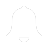

{'top_img': 'http://occupydemocrats.com/wp-content/uploads/theil-1.jpg', 'text': '13.8k SHARES SHARE THIS STORY\n\nS Trump’s number one backer in Silicon Valley just had his secretive data company slapped with a major federal lawsuit for employment discrimination. The U.S. Department of Labor filed suit charging that Palantir Technologies, the Palo Alto technology company controlled by Republican businessman Peter Thiel, accusing him of systematically discriminating against Asian job applicants in the company’s hiring process. Palantir is a federal government contractor to the NSA.\n\nSources say that Donald Trump wants to deliver a lifetime Supreme Court nomination to Thiel, who despises the First Amendment’s protections, anti-trust laws that break up monopolies and generally dislikes the institutions of democracy. Both the Stanford law school grad Thiel and Trump’s campaign later denied the report. Vanity Fair noted that:\n\nAccording to the lawsuit, Palantir looked at a pool of 130 

{'top_img': 'http://www.yesimright.com/wp-content/uploads/2015/11/radicalmuslim5_1.jpg', 'text': 'When Donald Trump said that he wanted to ban Muslim immigration until we know what’s going on, every single Democrat and liberal yahoo yelled until their voice was hoarse that it was racist.\n\nOh how wrong they were, and still are.\n\nFirst off, racism is the belief that one race is inherently better than another simply by virtue of the color of their skin. Islam isn’t a race, it is a religion that lends itself very well to radicalization. This is the same religion that has believers blow themselves up in crowded places thinking they’ll go to heaven to party with 72 virgins.\n\nThe insanity, in this issue, is clearly on the side of the Democrats. After seeing how the world is working, Trump wanted to put a temporary ban on all Muslim immigration until we figure out how to stop the terrorists from coming in.\n\nDemocrats think the world will agree with them, and they’re flat out wrong. Wel

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/08/Ibtihaj-Muhammad.jpg', 'text': '131.1k SHARES Facebook Twitter\n\nWell tell us how you really feel.\n\nNormally when a Muslim bashes the USA, you wouldn’t think that they’re an American themselves. Such wasn’t the case when it came to American Olympian fencer Ibtihaj Muhammad,who became the first American to compete in an Olympic games wearing a Hijab.\n\nAs it turns out, she has some nasty things to say about the country she’s representing.\n\nAccording to her, as quoted by The Federalist Papers:\n\n[I feel unsafe] all the time. I had someone follow me home from practice and try to report me to police. And this is right on 28th and 7th in New York City… I want people to know that as hard as [these racist incidents] are on me, they don’t come even close to things we’ve seen like the shooting in North Carolina or the rhetoric around the Khan family at the DNC. It’s ridiculous and we as a country have to change and I feel li

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/09/Capture-40.jpg', 'text': '6.6k SHARES Facebook Twitter\n\nGerman Chancellor Angela Merkel finally admitted to the press that if she could go back in time to change her stance on her open migrant policy she would. She is also admitting she is willing to consider a new policy direction. Merkel told the media at a press conference,\n\n“If I knew what change in refugee policy the people in Germany want, I would be prepared to consider it.”\n\nThese comments came shortly after the defeat of the Christian Democratic Union in Berlin’s Sunday elections. She also said,\n\n“If I could, I would go back in time to be better prepared for the refugee crisis in 2015, for which we were rather unprepared.”\n\nShe took responsibility for the poor election results after finding out the results of the Mecklenburg-Vorpommern election. Callying the defeat bitter and saying that she took full responsibility as the parties leader and as the count

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/composite_14743119289879.jpg', 'text': "Michelle Obama NOT Leaving The White House – Hillary Clinton Has Terrifying New Role For Her!?!?\n\nThe idea that I might have to spend the next 4 years continuing to cover the Obamas is actually making me a little ill. I was done with them after the first few days of the Barack Obama Presidency, but it would appear that Hillary Clinton has some roles for the President and First Lady after her coronation election.\n\nWhat exactly is First Lady Michelle Obama’s legacy? Trying to force our growing children to eat like anorexic bunnies and having scientific evaluations prove that her school lunch program is a bunch of crap? Or perhaps it will be the infamous “for the first time in my life I’m proud of my country.” I personally will remember her for strong hashtag activism and her “#BringBackOurGirls” sign.\n\nBut why remember her when one of the Presidential nominees promises to bring 

{'title': 'BREAKING: WikiLeaks Releases Proof Hillary Lied and The FBI Covered It Up', 'text': 'The FBI has issued a letter stating they are investigating new evidence in the case against Hillary Clinton’s use of a private e-mail server. The new evidence was discovered during an investigation into Anthony Weiner, who was caught sexting with a 15-year old girl, and who is the estranged husband of Clinton’s top aide Huma Abedin.\r\n\r\nApparently, Abedin and Weiner shared a laptop that potentially contained “tens of thousands of e-mails” from Abedin, including e-mails she forwarded to herself from Hillary’s e-mail account which were not turned into the FBI. What this might mean is many of the deleted Hillary e-mails were likely just recovered by the FBI. If any of the e-mails are work related or classified that means both Hillary and Huma Abedin lied to the FBI during their original investigation. Lying to the FBI is illegal, and that alone is enough to prosecute Hillary Clinton and Huma

{'top_img': 'http://100percentfedup.com/wp-content/uploads/2016/06/VINTAGE-BILL-AND-HILLARY.jpg', 'text': 'Dolly Kyle has written a scathing “tell all” book exposing the sickening hidden truth about Bill and Hillary Clinton. Hillary’s war on just about anyone who is beneath her, or who would dare to get in the way of her ascent to the White House. When will the media do their job and report the truth about this horrible opportunist?\n\nDolly Kyle – who was just 11 when she first crossed paths with Bill, dated him through high school and began sleeping with him once they graduated – published the claims about the Clinton couple’s racial epithets and politics in her new book, Hillary: The Other Woman, published by WND Books.\n\nShe writes of one occasion, when developmentally challenged children were having difficulty picking up the eggs at a traditional Easter egg hunt on the grounds of the governor’s mansion during Bill’s tenure in the Arkansas state house.\n\nReluctant hostess Hillary

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/09/whites-on-fire.jpg', 'text': '61.3k SHARES Facebook Twitter\n\nUpdate: Buzzfeed has deemed that our description of the crime and the victims is false. We have utterly debunked Buzzfeed’s claims. You can view our followup article here.\n\n~~~\n\nYou can’t make this stuff up. People used to tell crazy stories, but have no way to prove if the story was true or not.\n\nThen along came video.\n\nThis is by far one of the craziest things I’ve ever seen. These guys are out in the middle of the street and it looks like there was supposed to be a fight of some sort. Because you know how fights are, they’re even better when they’re in the middle of a major road.\n\nOut of nowhere someone lights them on fire.\n\nLIGHTS. THEM. ON. FIRE.\n\nAnd they’re still in the middle of the road, running around like crazy where they may get hit by a car.\n\nNothing but absolute chaos and easily one of the most disturbing things I’ve watched since 

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/Clinton-4.jpg', 'text': "Secret Video Records MASSIVE Hillary Event Flop!\n\nSoooo embarrassing for Hillary, Clinton. In Delaware, Ohio, Clinton was supposed to have a door-knocking event at 1 pm in the afternoon. One guy, who was documenting it for Donald Trump, showed up. He was it. No one came at all… when the staffers finally figured out who he was, they had him leave, but not before he got a gander at a whole lot of no one.\n\nI watched South Park last week and they joked that Clinton had maybe four supporters. It’s looking more and more like that is just about right. There are over 2 million people in that area and no one could be bothered to show up for the Hildabeast.\n\nFrom Gateway Pundit:\n\nAt Hillary Clinton’s Ohio campaign headquarters, volunteers were supposed to show up in droves to knock on doors for the Democratic presidential nominee. But, when this Donald Trump supporter showed up to the headquarters t

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/HC-e1474477291944.jpg', 'text': "BREAKING: Judge DEMANDS Release Of Clinton’s Security Training Files – She Has 5 Days…\n\nJust like Barack Obama and many people in his orbit, Hillary Clinton and her minions could never, ever in a million years pass a background security check. There are probably numerous terrorists who have cleaner backgrounds than these people and that’s no joke. They shouldn’t be cleared to clean a toilet there.\n\nThe Daily Caller News Foundation has been trying to get documents from the State Department forever concerning Clinton and her top aides completing recommended security training, briefings or courses on said security. Not only are these people willing morons concerning security, they have no desire to find out what they should and shouldn’t do. It’s called deniable plausibility. The Daily Caller News Foundation filed a FOIA lawsuit to get these people to produce mountains of documents. Will 

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/6-1-1.jpg', 'text': "BREAKING: Steps to FORCE FBI Director Comey to Resign In Process – Hearing Decides His Fate Sept 28\n\nThe FBI investigation of the Hillary Clinton e-mail scandal, where they acknowledged criminal activity yet refused to charge her anyway, has ignited a firestorm of criticism… and it looks like FBI Director James Comey might be the first casualty when heads start to roll. Comey gave immunity to all of Hillary’s top aides, including Chief of Staff Cheryl Mills, even though Mills had refused to cooperate with the FBI throughout the investigation and allegedly refused to give investigators her computer for examination. Now, the House Judiciary Committee has scheduled a hearing for September 28th that will decide Comey’s fate.\n\nFormer U.S. Attorney Joseph DiGenova has loudly called for Comey to resign and when that did not happen, demanded that he lose his job. “This now gets to the point of a serious q

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/blood.jpg', 'text': "BOOM! Charlotte Officials FINALLY Silence Rioters With One E P I C Announcement! [VIDEO]\n\nThe rioting in Charlotte has practically crippled the city. Businesses were looted, windows were smashed. So-called protesters have committed any number of crimes, from arson and assault, to murder. North Carolina Governor Pat McCrory was forced to declare a state of emergency and called in the National Guard to get the situation under control. And now, government officials have had enough too. They just made a huge announcement that will have people thinking twice before they start protesting again.\n\nOfficials just released a proclamation that says any people caught rioting, looting, destroying property or otherwise being violent in any unlawful manner will have their government benefits permanently revoked. But it doesn’t end there — any minor children who participate in the violence will face the same repe

{'top_img': 'http://now8news.com/wp-content/uploads/2017/04/united-airlines-bad-pr.jpg', 'text': 'During a flight from New York City to Chicago, violence erupted after a flight attendant assaulted a 7 month-old baby boy. This comes just hours after a man was dragged off of an overbooked United Airlines flight when he refused to get off the plane. He was pulled out of his seat and thrown into the aisle as seen on a video released on Monday.\n\nThe baby, whose name has not been released, was left with a welt mark across his face due to the assault. Eyewitnesses say the little boy was screaming for about 38 minutes straight and the parents were asked by the flight attendant several times to “quiet that annoying ass baby down.”\n\nAfter the 4th attempt to get the parents to comply, the flight attendant erupted into a rage grabbing the baby from the mother’s arms and slapping him in the face. It took several passengers to subdue the United Airlines employee.\n\nThe flight attendant was rest

{'top_img': 'http://uspoln.com/wp-content/uploads/2017/02/11-645x325.jpg', 'text': '“One of the things that the Bible has consistently denounced is the taking of the Lord’s name in vain. In fact, one of the Ten Commandments in the Old Testament states: “You shall not take the name of the Lord your God in vain, for the Lord will not hold him guiltless who takes his name in vain” (Exodus 20:7). The word “vain” means “for no reason” or “useless.”\n\n“Thus, God was instructing the Israelites to avoid using his name in a useless, disrespectful way. Instead, the Israelites were supposed to revere the name of God and use it in a serious, considerate way. Many of the ancient Israelites were so respectful of the name of God that they would not even pronounce it or write it for fear of using it in vain. Those who did write it would often throw away the quill they had used, because they thought that any quill that had written God’s name was holy and should not be used for regular words.\n\n“Dr. J

{'top_img': 'https://i1.wp.com/thelastlineofdefense.org/wp-content/uploads/2017/04/klu.jpg?fit=1200%2C630', 'text': "Join America's Last Line of Defense And Share This Article Now! 11.8k SHARES SHARE ON FACEBOOK SHARE ON TWITTER\n\nTed Nugent, 70’s rocker turned hunting guide and conservative icon, was shot and killed early this morning in a tragic hunting accident. While setting up his tree stand just outside a wildlife reserve in Montana, Nugent was fired on and hit in the chest by a hunter with a scope nearly a quarter of a mile away who believed he was a brown bear.\n\nDetails are still coming out, but apparently Nugent often hunts this are for animals that stray from the preserve. He was just setting up before dawn without any reflective or hunter’s orange visible, wearing a fur hat he would typically change for a camo and orange version once the sun came up.\n\nThe hunter who shot him faces manslaughter charges as the shot rang out and was recorded by a local game warden a full 1

{'top_img': 'https://world-politicus.com/wp-content/uploads/2017/07/83496164_8d24ad50-423e-4bd9-8863-349deaa1ce01.jpg', 'text': '62.1k SHARES Share\n\nObama is a shadow president that will not leave the current administration alone. He has been doing everything he can to mess up what Trump is doing. And being a liberal elite, he can get away with it. Everywhere President Donald Trump goes, Obama shows up too. A little odd, no? This concerning practice has gotten on the last nerve of the Trump administration and it shows that they are concerned with what Obama is trying to do. Obama needs to realize that he is no longer the president, no matter how much he wants to be.\n\nObama first went to Italy when Trump was there to try to disrupt what was going on there. Does he not know when to give up? It seems like now is as good a time as any. Obama’s administration is currently under investigation for many criminal actions they did while in office. Maybe he wants to try to deflect all of the 

{'title': 'BREAKING Autopsy Results From Vince Foster’s Exhumed Body–Cause Of Death To Be Changed', 'text': 'A string of events this week has led to incredible results in a 23-year-old case that had gone completely cold. After a reporter for The Washington Examiner was shot dead in front of his home and a letter was sent to his editor on his behalf, an investigation began into the death of Clinton attorney Vince Foster. Foster’s death in 1993 had been ruled a suicide.\r\n.\r\nWith new evidence, Rep. Trey Gowdy successfully petitioned a federal judge to have the body of Vince Foster exhumed for autopsy. The body wasn’t autopsied before burial the first time, which aided in the theory of a cover-up. Forensic specialists examined the body last night at the Naval Hospital in Norfolk, Virginia, concluding that the cause of death for Mr. Foster should be changed from suicide to homicide.\r\n.\r\nLT Col. James McFitting, head of the hospital’s forensics lab, told reporters in his office that 

{'title': 'Confirmed Justice Ruth Bader Ginsburg is RESIGNING From The Post of Associate Justice of the Supreme Court', 'text': 'If this is true it will mean an opening for another Conservative Justice to be appointed by President Trump.\r\n\r\nShe said she will resign if Trump was elected President, and now when he got elected, and with a month until the inauguration, she will be resigning.\r\n\r\nThe Supreme Court is in recess for the summer, but Justice Ruth Bader Ginsburg took some time to reflect on its future composition, which will chiefly depend on who is elected president in November. Asked on Thursday about the prospect of Donald Trump being handed the job of selecting the next crop of justices, she seemed uneasy at the thought.\r\n\r\n“I DON’T WANT TO THINK ABOUT THAT POSSIBILITY, BUT IF IT SHOULD BE, THEN EVERYTHING IS UP FOR GRABS,” SHE TOLD THE ASSOCIATED PRESS IN A WIDE-RANGING INTERVIEW THAT ALSO TOUCHED ON THE LOSS OF HER DEAR FRIEND ANTONIN SCALIA AND SOME OF THE COUR

{'top_img': 'http://proudleader.com/wp-content/uploads/2017/03/25602642832_4ae1e69452_b.jpg', 'text': 'Need more proof that liberalism is a disease? Two United States Representatives were just arrested for plotting to carry out the assassination of President Trump. These aren’t some off-the-hook left wing extremists, they’re typical men with what seem like typical lives but liberalism has turned them insane with jealousy and rage.\n\nRep. Harold Spunkmeyer (D-Illinois) and Rep. Johnathon Leominster Jr (D-Massachusetts) were taken to a military holding facility under suspicion of terrorism for plotting to murder the President. Several of their closest aides as well as their families have also been detained. As we speak, a special unit of the Secret Service is closing the net on all of their friends and anyone else who could potentially cause harm to President Trump.\n\nAccording to reports, intelligence was gathered from the men’s computers that they were planning to ambush the presiden

{'top_img': 'http://stgeorgegazette.com/wp-content/uploads/2017/06/Donald-Trump-to-resign.png', 'text': 'WASHINGTON, D.C. (AP) — At a press conference early this morning, House Speaker Paul Ryan announced news of a presidential resignation happening within the next 30 days.\n\n“Donald Trump plans to step down as President of the United States and resign from office within the next 30 days,” Ryan told reporters. “Amid the fury of scandals with Russia, the growing criticism from world leaders, the numerous problems his administration and cabinet have had, his lack of care for the environment; Republicans and myself believe this is the best thing to happen, and with some persuasion, Trump has also agreed this was for the best.”\n\nNews of this comes as Russia’s hacking and involvement into altering the 2016 Election have become clearer. In addition to this, the F.B.I. announced yesterday that they have discovered Russian property holdings which they believe are owned by Trump, gifted to h

{'title': 'War on Christmas Obama orders ban on Christmas cards to military', 'text': 'Obama’s military command will prevent delivery of Christmas cards being sent from families to their servicemen loved ones overseas spokesmen for The Pentagon said today. The White House claims that traditional Christmas greetings wish will upset Muslims in host countries and will have to convicted and returned to the sender.\r\n\r\nPer executive order,all overseas military mail will be monitored for references to Christmas, Jesus Christ, or pork products which are known to offend Muslims.\r\n\r\nAn Army Veteran who reached out to Fox News said Pentagon leadership is “hypersensitive to anyone who says they feel like their rights are being violated.”\r\n\r\n“It’s extremely frustrating,” the soldier said. “The U.S. Military is living in fear of radical Muslims.”\r\n\r\nThe soldier, who asked not to be identified because he feared being disciplined or assaulted my Muslims, said many people are furious ov

{'top_img': 'http://bestthings.us/wp-content/uploads/2017/04/BEST.png', 'text': 'Other than acting, Keanu’s wisdom towards life and in the present times really gives a real lesson for all of us.\n\n“I cannot be part of a world where men dress their wives as prostitutes by showing everything that should be cherished. Where there is no concept of honor and dignity, and one can only rely on those when they say “I promise” .\n\nWhere women do not want children, and men don’t want a family.\n\nWhere the suckers believe themselves to be successful behind the wheel of their fathers` cars, and a father who has a little bit of power is trying to prove to you that you’re a nobody.\n\nWhere people falsely declare that they believe in God with a shot of alcohol in their hand, and the lack of any understanding of their religion.\n\nWhere the concept of jealousy is considered shameful, and modesty is a disadvantage.\n\nWhere people forgot about love, but are simply looking for the best partner.\n\nW

{'top_img': 'https://uspoliticsinfo.com/wp-content/uploads/2017/05/jamescomey_070815fr-618x348-2.jpg', 'text': '\n\nAnonymous sources within the FBI have revealed to The Times that they have new evidence indicating that everyone who voted for Donald Trump is an agent of the FSB (formerly the KGB). An unknown portion of these voters may have had their minds controlled by a Russian space-beam, agents close to the investigation say.\n\nThe allegation that 62 million Americans appear to be employed by Russian intelligence services has rocked the Bureau, and it is reported that multiple agents have taken their own lives, given that realizing just how deep this Russian hacking conspiracy runs blew their minds – literally.\n\nThis shocking new revelation comes after it was confirmed as a fact that Russia did Wikileaks because Donald Trump personally called Vladimir Putin and asked him to. It was also revealed earlier this week that Alex Jones (real name “Alexi Jonesinov”) is a Russian sleeper

{'top_img': 'https://i1.wp.com/weconservative.com/wp-content/uploads/2017/05/maxresdefault.jpg?resize=1000%2C600', 'text': '1.1k SHARES Share Tweet\n\nAccording to America’s Last Line Of Defense:\n\nFox News’ bright and shining primetime star, Tucker Carlson, was involved in a hit and run head-on collision on his way home from his live broadcast of “Tucker Carlson Tonight,” which is shot at Fox News in New York City. NYC Police Sargeant Michael O’Leary told reporters that while he couldn’t confirm the identity of the driver, a well-known news anchor was rammed in what looked like an act of violence and not an accident.\n\n\n\nEMT’s on the scene were heard on their radios describing the man as Fox News anchor Tucker Carlson after retrieving his wallet. He was transported to Saint Mary’s where he is said to be in critical condition and awaiting surgery. No other information is available from the hospital, which also refuses to release anything until they get the OK from police.\n\n\n\nTh

{'top_img': 'http://www.blackinsurancenews.com/wp-content/uploads/2017/02/o-JAMES-PORTER-NRA-facebook-768x495.jpg', 'text': 'By Free Wood Post\n\nHOUSTON — It seems new National Rifle Association President (NRA) president Jim Porter may have found himself in a bit of hot water.\n\nNot long ago he made his feelings about the Civil War known when he referred to it as the “War of Northern Aggression.” In that same speech he referred to President Obama as a “fake president” and Attorney General Eric Holder as “rabidly un-American.” However none of those remarks that anyone could deem as racist compare to his remarks made at a recent press conference discussing his new leadership role at the NRA.\n\n“I’m very proud to be taking the lead here at the NRA. We need to really buckle down and strap on our best arguments to defend what is our God-given rights. No more northern folk tryin’ take away what is rightfully ours. I will not stand by and let some liberal-elitists try to ruin what has made

{'top_img': 'https://theredshtick.com/wp-content/uploads/2017/05/colonel-sanders.jpg', 'text': 'Fresh off his gaffe involving President Andrew Jackson and the Civil War, Donald Trump has made yet another historical faux pas regarding the “War of Northern Aggression.” In an interview with The Red Shtick, Trump regaled us with his other thoughts on the war that an angry Jackson totally saw coming.\n\nTrump has been struggling to defend his comments — widely deemed preposterous, even by St. Landry Parish educational standards — in which he claimed a man who owned as many as 300 slaves would’ve found a way to prevent the Civil War.\n\nThe Donald, a member of the Party of Lincoln, elaborated on his recent controversial remarks about how the first Democratic U.S. president, who died 16 years before the Civil War, would have managed to avoid a war the first Republican president could not.\n\nTrump, a noted fan of Kentucky Fried Chicken, explained how Col. Sanders took five loaves of Evangelin

{'title': 'BREAKING Florida Moves For FULL RECOUNT Of State Over Massive Voter Fraud DETAILS', 'text': 'According to a lawsuit filed Monday in Leon Circuit Court, it was Hillary Clinton who won the state of Florida, not Donald Trump. In an attempt to overturn the election results, Floridians have filed a motion for a recount in their state. According to the Detroit Free Press, “hacking, malfunctioning voting machines, and other problems” are sole … '}
{'top_img': 'http://occupydemocrats.com/wp-content/uploads/occupy-democrats.jpg', 'text': '335 SHARES SHARE THIS STORY\n\nRepublican attacks on transgendered Americans and the religious fight to keep gender a binary delineation took a turn for the bizarre this week when Virginia Republican Mark Cole filed a bill that would force schools to check the genitals of their students in order to ensure that they are using facilities reserved for their “anatomical sex:”\n\nLocal school boards shall develop and implement policies that require every

{'title': 'Eric Trump ‘My Father’s Tax Return Is Irrelevant Because We’re Going To Cancel Taxes For WEALTHY People Anyway’', 'text': 'President Donald Trump was very active on Twitter Easter morning and lashed back at protesters wanting to see his tax returns, saying he shouldn’t have to show them since he “easily won the Electoral College.” Moments after he defended no longer calling China a currency manipulator, now that they are giving him a helping hand with North Korea, Trump dismissed calls for his tax returns by responding on Twitter. “I did what was almost an impossible thing to do for a Republican-easily won the Electoral College! Now Tax Returns are brought up again?” Trump tweeted.\r\n\r\nAs always, his son Eric was there to provide a helping hand in defending his father. During an brief phone interview with KYXL Radio based out of Orlando, Florida, President Trump’s second son argued that his father’s tax return is “irrelevant,” largely because “he knows all there is to kno

{'top_img': 'http://freedumjunkshun.com/wp-content/uploads/2017/04/breaking.jpg', 'text': 'As we promised, Freedom Crossroads has just learned the identity of the Democrat James Comey has been having an affair with for at LEAST the last 8 months, it’s none other than the DISGRACED former Chair of the DNC, Debbie “Whiny Democrat” Wasserman Schultz — talk about a match made in Heave… errrrr… Hell!\n\nThese two dimwits were probably attracted to each other because they are both LOSERS who can’t accept defeat, but that doesn’t really differentiate them from the rest of the crybaby Democrat Party, now does it?\n\nBREAKING: James Comey’s Affair Interfered With The Clinton Investigation\n\nAccording to our exclusive sources, Comey and Wasserman Schultz met while both working for the government, and despite the fact that both of them are married, they couldn’t put aside their lust for each other and decided to have an affair. Not exactly shocking, considering they’re two liberal sickos — and w

{'top_img': 'http://patriotcrier.com/wp-content/uploads/2017/05/seth-rich-2.jpg', 'text': 'HERE Is WHAT WILL HAPPEN If The DEEP STATE TAKES DOWN PRESIDENT TRUMP & It’s NOT PRETTY … FOR THEM\n\n“The tree of liberty must be refreshed with the blood of patriots and tyrants.” – Thomas Jefferson\n\nELDER PATRIOT – Corrupt politicians ignore Jefferson’s directive to their own detriment. It’s no longer political, it’s personal.\n\nAmericans have had their eyes opened by the ascension of Donald Trump and no amount of leftwing money can put the Freedom Movement genie back in the bottle.\n\nConservative Senator Ted Cruz made that observation after reviewing the results of the 2016 elections and the expectations of the voters.\n\nCruz, who had the most high profile personality clash with Donald Trump during the Republican primary process nevertheless embraced Trump’s America First agenda and said, “If we’re given the White House and both houses of Congress and we don’t deliver, I think there will

{'top_img': 'http://static.lakana.com/media.fox5dc.com/photo/2016/08/25/Still0825_00018_1472181382501_1917472_ver1.0_640_360.jpg', 'text': 'Seth Rich Seth Rich\n\n- EDITOR\'S NOTE (5/17/17): We want to update you on a story you first saw on FOX 5 DC. We want to make an important clarification on claims that were made by Rod Wheeler, the private investigator hired by Seth Rich\'s family, whose services are being paid for by a third party.\n\nWhat he told FOX 5 DC on camera Monday regarding Seth Rich\'s murder investigation is in clear contrast to what he has said over the last 48 hours. Rod Wheeler has since backtracked.\n\nIn an interview Monday, Wheeler told FOX 5 DC he had sources at the FBI confirming there was evidence of communication between Seth Rich and WikiLeaks. This is the verbatim of that exchange:\n\nFOX 5 DC: “You have sources at the FBI saying that there is information...”\n\nWHEELER: "For sure..."\n\nFOX 5 DC: “...that could link Seth Rich to WikiLeaks?"\n\nWHEELER: "Ab

{'title': 'BREAKING Clinton Foundation Ordered To Cease Operations – Chelsea Charged With Fraud', 'text': 'As we know, Clinton Foundation has been given an A+ as a charitable organization. It slightly made more reputable than the Red Cross. Now, it has been ordered to cease operations. Chelsea Clinton, the CEO, has been charged with fraud and a warrant issued for her arrest. But, following this news, Clintons were nowhere to be found for an interview.\r\n\r\nThe reason behind the shutdown is the alleged ‘’pay for play’’ donations that saw rich and powerful terrorists gain access to Washington DC in exchange for cash. During Clinton’s time as Secretary of State, it’s been rumored that the 9/11 attack mastermind along with Obama Bin Laden were all invited to the White House residence for ice cream sundaes and an evening of Scattergories. Then, the creator of ISIS, Osama Bin Laden was sent to Cheyenne Mountain to be sent off-world and kept safe from prosecution while Obama and Clinton sta

{'top_img': 'https://politicalmayhem.news/wp-content/uploads/2017/06/town-1.jpg', 'text': 'There is not a day that goes by that we don’t hear about a Muslim terror attack taking place somewhere in our world, but that hasn’t stopped leftists from defending them at every opportunity. Those of us that criticize the so-called “religion of peace” are subjected to ridicule and even being attacked for our belief of how dangerous Muslims are. In Europe, those that speak out against Islam are being imprisoned for their belief. Courts are actually sentencing people for “Islam anti-blasphemy” laws. While this may be par for the course in Europe right now, it is not the way we roll in America, until now. Minnesota has just established a similar law.\n\nAnti-blasphemy laws are a huge victory for Muslims because it ensures their protection and in turn, allows them to continue acting in whatever manner they please all the while marching towards Sharia Law.\n\nAccording to Minneapolis’ local newspaper

{'top_img': 'http://walkwithher.com/wp-content/uploads/2017/03/20177638393_fdae28e39d_b-645x325.jpg', 'text': 'Recently, Republican Ohio Gov. John Kasich vetoed the so-called “heartbeat bill,” a measure that would have banned all abortions after about six weeks of pregnancy, or before many women even know that they are pregnant. At the same time, Kasich signed a bill banning abortion after 20 weeks of pregnancy, with exceptions only for saving a pregnant woman’s life or preventing the “substantial and irreversible impairment of a major bodily function.”\n\n“At the risk of sounding discriminatory, which is not at all my goal here, but at the risk of sounding like that, there is no way women should be allowed control over whether or not they are going to have abortions,” Kasich told the Ohio Daily Star. “Women are wonderful beings, they are kind, loving, incredible and a whole other plethora of adjectives could be used to describe them, but at the end of the day, I’m sorry to have to say

{'top_img': 'https://i1.wp.com/thelastlineofdefense.org/wp-content/uploads/2017/02/a1a.jpg?fit=1200%2C630', 'text': "Join America's Last Line of Defense And Share This Article Now! 20.1k SHARES SHARE ON FACEBOOK SHARE ON TWITTER\n\nFormer president and breaker of laws, Barack Obama, will either surrender himself or be picked up by the FBI sometime today to be booked and charged with unlawful use of authority, wire fraud and conspiracy to interfere with free elections after it was confirmed that he ordered the tapping of the phones at Trump Tower during the presidential election.\n\nThe order, which isn’t something even a president can do without the signature of a federal judge, was to listen in on Trump and his children to try to find a connection to Russia. Nothing came of it since President Trump nor any of his campaign staff have ever been to, spoken with or had anything to do with Russia or its agents.\n\nTrump first disclosed the bombshell in an early morning tweetstorm, knowing 

{'title': 'Target to discontinue sale of Holy Bible', 'text': 'The White House has approved the redesign of U.S. currency.  Barack Obama will be on the new dollar bill.\r\n\r\nThe Obama Administration feels that the American dollar is in bad need of a makeover.  They have partnered with the Dollar ReDe$ign Project to pick a new design for U.S. currency.  Currently, the design that the administration likes best was done by Dowling Duncan (a British duo), which features a unique vertical design.  It also features President Obama on the one dollar bill.\r\n\r\n“We love the Dowling Duncan look.  They’ve come up with a creative design and put President Obama where he belongs… on number 1,” said David Axelrod, Senior Adviser to President Obama.\r\n\r\n\r\n\r\nThe Dollar Redesign Project was organized by creative strategy consultant Richard Smith.  He is still soliciting ideas for the dollar bill of the future. “Our great ‘rival’, the Euro, looks so spanky in comparison it seems the only clea

{'top_img': 'http://uspoln.com/wp-content/uploads/2017/07/michelle-bachmann-645x325.jpg', 'text': 'On Sunday, ex-Rep. Michelle Bachmann spoke with Breitbart News about the protests outside of a Donald Trump campaign stop in Minneapolis, claiming that the protesters acted violently toward Trump supporters. Bachmann argued that President Obama has “sanctioned” violence, as long it protects the “people favorable to the Obama position, politically.” She insisted that the president is sending “a signal to Donald Trump supporters: Don’t attend Donald Trump events because you could be physically assaulted.” She also linked the Obama administration’s “lawlessness” to the incident in Minneapolis, claiming that Obama has effectively condoned violence against conservatives and white people, leaving “normal” people helpless in the face of anarchy.\n\n“And these days it has become so obvious that I’m honestly surprised we’re not having riots throughout the country,” she said. “When did this become 

{'top_img': 'http://uspoln.com/wp-content/uploads/2016/11/Stephen-Bannon-645x325.jpg', 'text': 'The recently installed CEO of Donald Trump was accused of domestic violence against his second wife, who later said he threatened to leave her penniless unless she failed to testify against him. According to Politico, Breitbart News chairman Stephen Bannon was charged with battery, dissuading a witness, and misdemeanor domestic violence in connection with a January 1996 incident in the couple’s southern California home.\n\n“I was wondering when this would come up,” Bannon told Politico. “It’s been a while and given my current position at the head of Donald Trump’s campaign, I was curious to see how long it would take the Democrats to start digging around my past and try to find enough filth and misinformation to use as ammunition to bring me down. And while we’re on the subject, I’m actually disappointed; I honestly didn’t expect them to take this long,” he said laughingly.\n\nAsked to comme

{'top_img': 'https://obnoxioustv.files.wordpress.com/2013/03/20130305-000628.jpg', 'text': 'New York Man Wanted For Infecting 240 Men And Women With HIV!!!\n\n\n\n\n\nThis will blow your mind…Read how a New York man has allegedly infected 240 people with the HIV virus by sleeping with men and women.\n\n“I met Stephawn when I was 19 years old,” explains Joshua Johnson on his blog.\n\nHe continues:\n\n“At 19, I was still trying to figure out my sexual orientation. I was still a virgin, because I was raised with traditional values. I was attracted to females, but I was also attracted to men. In fact, my attraction to men was stronger. I desperately tried to fight my attraction to the same sex, because I knew if I gave in that would mean a lifetime as an outcast in my family.\n\nJohnson goes on to explain in great detail how he fell victim to a sexually promiscuous fugitive who is wanted for allegedly infecting at least 240 people with the HIV virus that causes AIDS.\n\nLadies, as you read

{'top_img': 'http://static.politico.com/e6/39/fd05beec4b3bbe9db806e2ff1141/20160926-debate-prep-ap.jpg', 'text': 'Hillary Clinton’s campaign is making one plea ahead of Monday night’s big debate: Don’t let Donald Trump get away with it.\n\nAnd Trump’s campaign is firing right back, arguing that the press is biased against the Republican nominee and, in any case, Clinton’s team is just trying to “game the refs.”\n\nStory Continued Below\n\nThe debate is playing out against a backdrop of polls that indicate a tightening White House race, with Trump drawing even or ahead in national and battleground-state surveys. Polling averages now show that Clinton’s post-convention lead has evaporated, and no less a guru than Nate Silver declared on Monday morning that the race is a “dead heat.”\n\n“The latest polling is consistent with a Clinton lead of only ~1% nationally. State firewall breaking up. Trend lines awful,” Silver tweeted.\n\nDuring the critical hours of expectation-setting ahead of th

{'top_img': 'http://v.politico.com/images/1155968404/201609/1397/1155968404_5141384022001_5139891128001-vs.jpg?pubId=1155968404', 'text': "Off Message Is Donald Trump qualified to be president? In the most pivotal moment of 2016, these are the questions he must answer.\n\nH.L. Mencken declared there was only one way to look at a politician — “down.”\n\nLikewise, there’s really only one way to look at the first presidential debate on Monday: as the first serious job interview for potential President Donald John Trump — an opaque candidate who has hidden behind a steel curtain of one-liners, faux familiarity and universal celebrity.\n\nStory Continued Below\n\nYeah, yeah, yeah, it’s a big night for Hillary Clinton too. She’s got a lot to prove, for real, namely that she’s not the lying, self-dealing crook many Americans think she is — or at least convince the 55 percent of voters who don’t like her that her virtues (temperament and experience) compensate for decades of assorted ick. She 

{'top_img': 'http://static.politico.com/89/08/33b4aa9842b5af9d355e1ac415de/160923-ted-cruz-gty-1160.jpg', 'text': '"Donald, you’re a sniveling coward," Ted Cruz said in March. | Getty 9 times Ted Cruz insulted Donald Trump before endorsing him\n\nTwo months after he was booed off the stage at the Republican National Convention for snubbing his party’s presidential nominee, Sen. Ted Cruz endorsed Donald Trump on Friday.\n\nThat declaration to vote for him, though, comes after the Texas senator openly disparaged his primary opponent repeatedly — in part responding to Trump’s attacks on his wife and father.\n\nStory Continued Below\n\n1. Early on, Cruz speculated that Trump’s tax returns could show a mob connection\n\nIn February, Cruz offered his take on why Trump hadn’t released his tax returns in an interview on NBC’s “Meet the Press,” suggesting that they might show “Donald\'s business dealings with the mob, with the mafia.”\n\n“The fact that Donald seems terrified to release his taxe

{'top_img': 'http://static.politico.com/c9/c0/fae428464ce8b51f984194f193fd/160926-greenfield-hillary-ap.jpg', 'text': 'I’ve watched every presidential debate ever broadcast, including the little-remembered John F. Kennedy-Hubert Humphrey contest just before the 1960 West Virginia primary, and for nearly 40 years I\'ve analyzed how candidates win and lose them. But when I ask myself what kind of strategy I would devise for Hillary Clinton tonight against Donald Trump, I’m pretty much baffled.\n\nThe problem is not just the unpredictable (to put it mildly) nature of her opponent. (Will Trump be low-key and calm? Will he attack her honesty? Will he turn on Lester Holt after the first tough question and walk off the stage?) The problem is that almost all of Hillary Clinton’s strengths, in this strange election year, can so easily be turned into her weaknesses—especially her vast experience in government. The more she emphasizes her qualifications, the more Trump is likely to respond with s

{'top_img': 'http://static.politico.com/f8/28/9a24e8694be08b785928004f7e11/160920-lester-holt-gty-1160.jpg', 'text': 'Lester Holt, who anchors "NBC Nightly News," will be the moderatorfor the first debate. | Getty Everything you need to know about Trump and Clinton’s first 2016 presidential debate\n\nWhen is the first general election presidential debate?\n\nThe first general election presidential debate of 2016 will be held at Hofstra University in Hempstead, New York on Sept. 26.\n\nStory Continued Below\n\nWhat time is the debate and how long is it?\n\nThe debate will start at 9:00 p.m. Eastern Time and run for 90 minutes without commercial breaks.\n\nHow can I watch the debate?\n\nIt will be broadcast on all of the major television networks, as well as the websites for major cable news channels and C-SPAN.\n\nWho will participate in the debate?\n\nFormer Secretary of State Hillary Clinton and celebrity real estate mogul Donald Trump. No other candidates qualified.\n\nWho will moder

{'top_img': 'http://v.politico.com/images/1155968404/201609/1540/1155968404_5142194641001_5142158442001-vs.jpg?pubId=1155968404', 'text': 'Obama wears hat, breaking ‘Politics 101’ rule on headgear\n\nPresident Barack Obama violated the longstanding, albeit unofficial, rule against presidential headgear on Monday when he accepted a hat and blanket at the White House Tribal Nations Conference.\n\nThe president was given the hat and blanket by Native American leaders as he took the stage ahead of remarks at the conference. He wore the blanket around his shoulders as a song was played in his honor, but took the hat off after just a few moments.\n\nStory Continued Below\n\n“What an amazing honor and what a kind gesture, for the honor song and the blanket and the hat,” Obama said once he took the podium. “I have to say that I am very glad that you also have a blanket for Michelle so she doesn’t steal mine. She would, too. I’m just saying.”\n\n“That was very moving, and is a reminder of the g

{'top_img': 'http://occupydemocrats.com/wp-content/uploads/image-31.jpeg', 'text': '11.7k SHARES SHARE THIS STORY\n\nThe Senate reconvened this week as Democrats introduced a transparency in Presidential candidates bill that would force Donald Trump to release his tax returns, if Republicans would only be willing to face everything their racist nominee has done in his business career:\n\nDemocrats are backing legislation from Sen. Ron Wyden (D-Ore.) that would require presidential candidates to release their tax returns within 15 days of receiving the party’s nomination. It would also require the FEC would release the documents after 30 days, if a candidate did not. “We’re going to be here next week. We’re probably going to have some downtime,” Sen.Chris Murphy (D-Conn.) told reporters. “There’s no reason we couldn’t vote.”\n\nDemocratic candidate Hillary Clinton and her husband the former President Bill Clinton have both disclosed over 30 years worth of tax returns, and all of the Cli

{'top_img': 'http://static.politico.com/c0/fa/5f8c72c64089a064978442322665/trump-16-gty-1160.jpg', 'text': '"He didn\'t ask her about a lot of things she should have been asked about," Donald Trump said about Lester Holt. | Getty Post-debate, Trump team hits moderator Holt for \'some hostile questions\'\n\nDonald Trump and his campaign complained Tuesday morning that debate moderator Lester Holt targeted him for unfair questioning while neglecting to ask Hillary Clinton about any of her various scandals.\n\n“They were leaving all of her little goodies out. They didn\'t ask her about, you know, much,” Trump said on Fox News’s “Fox and Friends.” “But I was asked about my tax returns, which I\'ve told about 500 times. But, you know, I think I did — I think I really did well when we were asked normal questions. I think I did really well in answering those questions, but those questions are not answerable in a positive light.”\n\nStory Continued Below\n\nStill, Trump was upbeat overall abou

{'top_img': 'http://a.abcnews.com/images/Politics/AP_drexel_160927_16x9_992.jpg', 'text': 'During a campaign stop in Philadelphia, Vice President Joe Biden slammed Donald Trump’s debate performance Monday night –- specifically taking umbrage with the GOP nominee\'s comments on the housing crisis.\n\n"This is a guy who said -- and wants to be president -- that it was good business for him to see the housing market fail. What in the hell is he talking about?" Biden said during a rally at Drexel University. "Every president I have served with, including Republicans, has had a moral center about what it was to be an American, about what we’re supposed to do, about what basic fundamental rights are."\n\nBiden asked the crowd if they could imagine Ronald Reagan, "saying it\'s good business to take advantage of people’s misery, rooting for that misery?"\n\n"He does not have the basic fundamental sensibilities and values that almost every American politician left, right and center I know have,

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160719214618-chris-christie-rnc-super-tease.jpg', 'text': 'Newark (CNN) Former Port Authority executives and New Jersey Gov. Chris Christie staffers planned to make the traffic from the September 2013 lane closures at the George Washington Bridge "as bad as possible," according to testimony heard in federal court Monday.\n\nDavid Wildstein, former Port Authority director of Interstate Capital Projects, testified that in June 2013, Bridget Kelly, Christie\'s former deputy chief of staff, was upset that their office had not secured the endorsement of the Democratic mayor of Fort Lee New Jersey, Mark Sokolich, for Christie\'s reelection campaign.\n\nWildstein, who has previously pleaded guilty to one charge of conspiracy to commit fraud on federally funded property and one civil rights violation, told Kelly that shutting down access lanes to the George Washington Bridge to put some political pressure on Sokolich was an option, accordin

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/Biden1.jpg', 'text': 'If there’s anyone in this day and age who most definitely doesn’t mince words, and will say what needs to be said, it’s Vice President Joe Biden.\n\nWhile speaking in Philadelphia, Pennsylvania on a campaign stop for Hillary Clinton, Biden tore into some of the remarks from Monday’s debate. Especially when Donald Trump seemed to think it’s perfectly fine to screw over the American people, or benefit from their sorrow.\n\nBiden said:\n\n“This is a guy who said — and wants to be president — that it was good business for him to see the housing market fail. What in the hell is he talking about?”\n\nAdding:\n\n“Every president I have served with, including Republicans, has had a moral center about what it was to be an American, about what we’re supposed to do, about what basic fundamental rights are.”\n\nThen really getting to the core of it, he said:\n\n“He does not have the b

{'top_img': 'http://static.politico.com/49/14/53e2365742a1b9469034f59209de/08-hillary-clinton-1-ap-1160.jpg', 'text': "Hillary Clinton said this year's election will impact the next 50 years of America. | AP Photo Clinton: ‘The next 50 days will determine the next 50 years’\n\nHillary Clinton on Tuesday warned that the nearly 50-day sprint to Election Day will impact far more than just the next four or eight years.\n\nMaking an appeal to black voters during an interview on the “Steve Harvey Morning Show,” Clinton stressed that voters can’t sit this one out.\n\nStory Continued Below\n\n“Every issue they care about is at stake in this election,” Clinton said. “This is not: ‘Oh, you know, a little here, a little there. We can — you know, we can take it, no matter who wins.’ No. The next 50 days will determine the next 50 years, and I say that absolutely seriously.”\n\nThe former secretary of state said she hopes everyone is registered to vote and directed listeners to a website to find ou

{'top_img': 'http://a.abcnews.com/images/Politics/GTY_Debate01-hb_160926_16x9_992.jpg', 'text': 'Hillary Clinton and Donald Trump ushered the 2016 presidential campaign into a new phase tonight, and they did it with plenty of barbs.\n\nThe two candidates faced off in their first general election debate at Hofstra University in Long Island, New York, in front of what was expected to be a historic number of television viewers.\n\nHere are 10 moments that mattered at the first general election presidential debate:\n\n1. Nominees Started Off on a Friendly Note but No Escaping the Sarcasm\n\nHillary Clinton and Donald Trump have lobbed insults at each other from far away for months, but tonight they tried to start their highly anticipated face off on a genteel note, although the mutual contempt was just below the surface.\n\nWhen Clinton walked out in a red pantsuit and Trump in a blue tie -- the opponents’ trading traditional party colors -- the two shook hands and Clinton said, “How are y

{'top_img': 'http://static.politico.com/e9/11/6144cdc24e319c921fea909525b3/manufacturing.jpg', 'text': 'Getty Images Wealth Of Nations Trump vs. Clinton: A Fundamental Clash over How the Economy Works He sees it as zero-sum. She believes all boats rise together. Hillary is right, but a lot of people are buying into Trump’s vision.\n\nAs he made clear once again in Monday night’s debate, Donald Trump sees the world in zero-sum terms—when one person or one country wins, another always loses. Asked by NBC’s Lester Holt how to help American workers, Trump responded in his usual way, saying America was getting beaten by everyone else around the world, and the NAFTA free-trade deal was “one of the worst things that ever happened to the manufacturing industry. ... We have to stop these countries from stealing our companies and our jobs.”\n\nHillary Clinton, by contrast, sees the world as a place where all boats can rise at once—as she also made plain Monday by harking back to Bill Clinton’s p

{'top_img': 'http://eaglerising.com/wp-content/uploads/2016/09/donald-trump-1.jpg', 'text': 'Last week I wrote an article titled “Donald Trump’s Amazing Week” which must have been incredibly annoying to liberals and “Never Trumpers” everywhere. Guess what? This past week has been even better for the 2016 Republican nominee for president, the man whose candidacy was considered a vanity exercise a year and a half ago. Well no one is laughing anymore.\n\nThe latest round of polls shows that the support for the Trump presidency is growing rapidly. The latest Fox News Poll, which was taken from September 11-14, shows Donald Trump polling at 46%, a one-point lead over Democratic nominee Hillary Clinton at 45%. The LA Times/USC poll taken from September 9-15 shows Trump at 47% with a six-point lead over Clinton at 41%. The gap between the two candidates is also narrowing in the key battleground states. The Suffolk University Poll which was taken from September 12-14 shows Trump at 42%, leadin

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160919171855-berm-camp-2-super-tease.jpg', 'text': 'United Nations (CNN) President Barack Obama made an impassioned plea Tuesday for countries to fulfill a moral obligation to alleviate a global refugee crisis "of epic proportions," despite a political backlash in the US against absorbing those fleeing Middle East violence.\n\nThe President\'s interest in calling attention to the tens of millions of displaced people around the world, and pushing back against the anti-refugee tenor, was underscored by his decision to convene a Leaders\' Summit on Refugees at the United Nations Tuesday.\n\nAt the summit, he also rejected another aspect of the American political debate swirling around accepting foreigners -- GOP presidential nominee Donald Trump\'s call to build a wall along the US-Mexico border.\n\n"This crisis is a test of our common humanity. Whether we give into suspicion and fear and build walls, or whether we see ourselves in ano

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160921195724-05-trump-clinton-split-0921-super-tease.jpg', 'text': 'Story highlights Hillary Clinton has a 6-point lead over Donald Trump in a four way race, according to a new poll\n\nClinton has the edge over Trump on a number of key issues in the poll ahead of the first presidential debate\n\n(CNN) Hillary Clinton holds a solid 6-point lead over Donald Trump heading into the first presidential debate next Monday, according to a new national poll released Friday.\n\nThe McClatchy-Marist poll found Clinton leading Trump 45% to 39% among likely voters in a four-way race. Libertarian Gary Johnson garnered 10% support, and Green Party candidate Jill Stein polled at 4%. A Wall Street Journal/NBC poll this week found Clinton leading by a similar margin, 43% to 37%.\n\nClinton maintains a massive lead among black voters in the new poll, pacing Trump 93% to 3% despite high-profile efforts by the Trump campaign to improve its outreach to m

{'top_img': 'http://a.abcnews.com/images/US/AP_Explosion3_ml_160919_1_16x9_992.jpg', 'text': 'The recent connected bombings in New York and New Jersey and the stabbing attack at a mall in Minnesota have increased interest in how the presidential candidates would handle national security.\n\nHillary Clinton and Donald Trump have spoken out since the attacks, which left dozens of people injured.\n\nJohn Cohen, a former counterterrorism coordinator for the Department of Homeland Security, said he believes that the terrorist attacks that have occurred during the campaign "have a significant impact" on voters.\n\n"When events occur like this ... you tend to have people become more fearful, and when people are more fearful, they tend to gravitate towards a candidate who appears to be more strong," said Cohen, who currently works as an ABC News consultant.\n\nThree of the latest national polls — all conducted before the attacks this weekend — had Clinton leading when respondents were asked wh

{'top_img': 'http://freedomdaily.com/wp-content/uploads/2016/09/image-58.jpeg', 'text': '7.5k SHARES Facebook Twitter\n\nA public high school has been accused of indoctrinated Islam into their students. Allegedly, the school has been mandating children profess the Islamic statement of faith, memorize the five pillars of Islam, as well as teaching students that the Muslims faith is stronger than a Christian or Jews. This is all according to lawsuit filed in federal court this past Wednesday.\n\nThe lawsuit was filed on behalf of John and Melissa Wood with the Thomas More Law Center and the action is being taken against La Plata High School in Maryland. According to John Wood the school banished him from their property when he complained about the Islamic teachings.\n\nRichard Thompson, President of Thomas More, said,\n\n“Defendants forced Wood’s daughter to disparage her Christian faith by reciting the Shahada, and acknowledging Mohammed as her spiritual leader.”\n\nThe Law Center comme

{'top_img': 'https://img.washingtonpost.com/rf/image_1484w/2010-2019/Wires/Images/2016-09-12/AP/France_Plastic_Ban-0fe15.jpg?t=20170517', 'text': '\n\nPlastic glasses, knives, forks and food boxes are being been banned in France. (Bertrand Combaldieu/Associated Press)\n\nPARIS — France has apparently become the first country in the world to ban plastic plates, cups and utensils, passing a law that will go into effect in 2020. Exceptions will be allowed for items made of compostable, biosourced materials.\n\nThe new law is a part of the country’s Energy Transition for Green Growth Act, the same legislation that also outlawed plastic bags in grocery stores and markets beginning in July. Although plastic bags are forbidden in other countries — including in some U.S. states — no country seems to have embraced a plastic ban as sweeping as France’s will be.\n\nThe general idea behind the law — following the landmark conference held in Paris last fall on curbing global warming — is to promote

{'top_img': 'http://static.politico.com/47/07/5255ce914040a7a0ca8aea7482f0/carter-page-ap-1160.jpg', 'text': 'In March, in a bold “Oh yeah?” moment during an interview with the Washington Post’s editorial board, Donald Trump took the paper’s dare and revealed, then and there, his very short list of foreign policy advisers. There were just five, though he said, “I have quite a few more.” The list was a head-scratcher, a random assortment of obscure and questionable pundits. One of the names, offered without elaboration, was, “Carter Page, PhD.”\n\nWho?\n\nStory Continued Below\n\nReporters quickly Googling found that Page is the founder and managing partner of an investment fund called Global Energy Capital, and that he claims to have years of experience investing in Russia and the energy sector. As for his connection to Trump, when Page was reached for comment by the New York Times the day after Trump’s big reveal, he said he had been sending policy memos to the campaign and the paper 

{'top_img': 'http://static.politico.com/46/6c/60519398418ea873d177635e78bd/caucus-debate.jpg', 'text': "The pressure is on Hillary Clinton.\n\nInsiders in both parties agree: Clinton, having lost most of her lead over the past few weeks and bringing more experience to the stage, faces higher expectations than Donald Trump when the two square off for the first debate on Long Island.\n\nStory Continued Below\n\nThat’s according to The POLITICO Caucus — a panel of activists, strategists and operatives in 11 key battleground states. Roughly equal percentages of Democrats (69 percent) and Republicans (74 percent) said Clinton is under more pressure to perform than Trump. But Democrats mostly lamented the low expectations for Trump, a relative political neophyte who has exhibited little command of the issues.\n\n“She shouldn't be [under more pressure], but so long as he avoids standing on stage and vomiting on himself, the press will give Trump a glowing review,” said a Nevada Democrat — who

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160919112740-obama-nj-ny-blast-super-tease.jpg', 'text': 'Story highlights Obams reaffirms US commitment to fighting ISIS\n\nObama praised the response from citizens in New York and New Jersey\n\nNew York (CNN) President Barack Obama worked to calm Americans\' jitters Monday after a series of attempts at mass violence, suggesting that yielding to fear amounted to a win for terrorists.\n\nDuring two appearances in New York, Obama praised the swift work of law enforcement authorities looking into duel bomb attacks in New York and New Jersey over the weekend. And he urged Americans to follow the lead of residents here by not submitting to fear.\n\n"I think it is important to remember what terrorists and violent extremists are trying to do. They are trying to hurt innocent people, but they also want to inspire fear in all of us, and disrupt the way we live to undermine our values," Obama said. "We all have a role to play as citizens in 

{'top_img': 'http://v.politico.com/images/1155968404/201609/362/1155968404_5135180646001_5135157700001-vs.jpg?pubId=1155968404', 'text': 'Pence gives no specifics on why Trump Foundation story is inaccurate\n\nWhen it comes to the Trump campaign\'s allegations of "inaccuracies and omissions" against a Washington Post story, running mate Mike Pence struggled late Tuesday night to account for specific examples.\n\nAppearing on MSNBC\'s "The 11th Hour with Brian Williams" after an evening rally in Williamsburg, Virginia, the Indiana governor backed up the Trump campaign\'s statement against the Post\'s reporting earlier in the day that Donald Trump spent $258,000 from his charitable foundation to settle legal issues.\n\nStory Continued Below\n\n"Well, I think what we found is that there is a number of factual errors in that story as there were in previous stories about the Trump Foundation. I\'m confident they\'ll be able to address those and demonstrate that they fully complied with the 

{'title': "'Locked the black bitch out': White students under investigation after racist Snapchat reveals campus harassment", 'text': 'The University of North Dakota is investigating a racist social media post that apparently shows white students locking a black student out of her own dorm room.\r\n\r\nIn a Facebook post on Tuesday, student Etonde Maloke shared a photo of three white female students laughing in a dorm room. The photo includes the caption, “Locked the black bitch out.”\r\n\r\n“My friend left her phone in her room and the three kids pictured below took her phone and took the snapchat pictured below,” Maloke wrote. “They captioned it ‘locked the black bitch out’. My friend was not aware that they had done this and didn’t even realize they had put this on her snapchat story until another friend of ours pointed it out.”\r\n\r\n“We all know Racism is alive and well (whether you like to admit it not),” she bemoaned. “When said acts of racism happen at your school, it is infur

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160206152814-gov-cuomo-jan-29-super-tease.jpg', 'text': 'Story highlights "I don\'t know how you could have been more aggressive than we were here," Cuomo said\n\nAhmad Khan Rahami was captured Monday after a manhunt and shootout\n\nWashington (CNN) New York Gov. Andrew Cuomo said Tuesday that Republican presidential candidate Donald Trump is wrong to suggest that the New York bombing suspect shouldn\'t receive medical care.\n\n"I understand the anger that Donald Trump is speaking to (but) this is America and this is our system and you are innocent until proven guilty and you have a right to counsel and that is the Constitution of the United States of America," he said on CNN\'s "New Day."\n\n"And that\'s what makes us who we are. That\'s what makes us special. And if you give that up, Alisyn, then you have defeated yourself," Cuomo, a Democrat who has endorsed Hillary Clinton for president this cycle, told CNN\'s Alisyn Camerota. "

{'top_img': 'http://a.abcnews.com/images/Politics/ap_Congress_Saudi_Arabia_er_160909_16x9_992.jpg', 'text': 'On Wednesday, the Senate is expected to override President Obama\'s veto, for the first time, on a bill that would allow the families of 9/11 victims to sue Saudi Arabia.\n\nSo how exactly does a veto override work?\n\nThe rules are described in Article 1, Section 7 of the Constitution. When the president rejects a bill, he is required to return it, along with his objections, to the chamber in which the bill originated. Then, the members of that chamber "shall enter the Objections at large on their Journal, and proceed to reconsider it."\n\nIn other words, the president sends vetoed Senate bills back to the Senate to reconsider first and vetoed House bills back to the House to reconsider first. In this case, the Justice Against Sponsors of Terrorism Act, or JASTA, began in the Senate, so the Senate votes first.\n\nBoth the House and the Senate require a two-thirds majority to su

{'top_img': 'http://a.abcnews.com/images/Politics/gty_debate_wide_from_back_ps_160926_16x9_992.jpg', 'text': "When Hillary Clinton attacked Donald Trump for not releasing his tax returns and allegedly paying zero in federal income taxes, the Republican presidential nominee had just four words to say in response.\n\n“That makes me smart,” Trump said from the debate stage at Hofstra University tonight.\n\nHe has said repeatedly he is being audited by the IRS and cannot release his tax statements until the review is concluded. But during the first general-election presidential debate, in Hempstead, New York, the real estate mogul vowed to release his tax returns “against my lawyer’s wishes” if Clinton releases emails she deleted from a private server she used while she was secretary of state.\n\n“As soon as she releases her 33,000 e-mails that have been deleted, as soon as she releases them,” Trump said tonight, amid cheers and applause, “I will release my tax returns.”\n\nThe White House

{'top_img': 'http://www.politico.eu/wp-content/uploads/2016/09/TrumpzillaRGB-1-1200x628.jpg', 'text': 'KALLSTADT, Germany — Few places in Germany are as representative of the country’s heartland as Kallstadt, the village in which U.S. Republican presidential candidate Donald Trump’s grandfather was born — and from which he was later deported.\n\nThe hamlet of 1,200 people lies nestled among vineyard-covered hills, about an hour-and-a-half’s drive southwest of Frankfurt. It has one bakery and one butcher. Every year, Kallstadt holds the Saumagenkerwe in celebration of the eponymous local delicacy: pig’s stomach filled with pork, herbs, bratwurst and diced potatoes.\n\nTrump may have captured a large swath of the American electorate with his signature blend of populism, nativism and brazenness. And yet, in the hometown of his forefather, he remains distinctly unpopular.\n\nIn fact, few politicians are less popular in Germany than Trump. A study by the Pew Research Center found out that o

{'top_img': 'http://occupydemocrats.com/wp-content/uploads/trumpobama-2.png', 'text': '24.8k SHARES SHARE THIS STORY\n\nRepublican nominee Donald Trump’s Ohio chairwoman recently took it upon herself to prove to the world just how delusional the right-wing in America really is when Kathy Miller told reporters that racism in America didn’t exist until President Obama. “I don’t think there was any racism until Obama got elected. We never had problems like this … Now, with the people with the guns, and shooting up neighborhoods, and not being responsible citizens, that’s a big change, and I think that’s the philosophy that Obama has perpetuated on America. Growing up as a kid, there was no racism, believe me. We were just all kids going to school.”\n\nThis perfectly illustrates how the right-wing digs their mental bogs of ignorance – blame Obama for literally everything; absolve self/race/identity group of all responsibility, then construct pleasant fantasy.\n\nSupporting her candidate’s 

{'top_img': 'http://static.politico.com/cb/e7/650b4f6e4601a63cd6b462ef0f53/160922-obama-saudi-ap-1160.jpg', 'text': 'President Barack Obama has never had a great relationship with Saudi Arabia.\n\nNow, he’s the last man standing between the wealthy desert kingdom and billions of dollars in potential liabilities.\n\nStory Continued Below\n\nObama has cast the Saudis as "so-called" allies; bemoaned the terrorist-inspiring version of Islam they practice; and even suggested the oil-rich Arab state learn to "share" the Middle East with rival Iran. The Saudis, meanwhile, consider Obama naive, sparring with him over the Iran nuclear deal and questioning his hands-off approach to Syria’s bloody civil war.\n\nDespite these differences, Obama has promised to veto a bill that Congress passed unanimously allowing families of 9/11 victims to sue Saudi Arabia over alleged links to the 2001 terrorist attacks.\n\nThat Obama and Riyadh find themselves on the same side against Congress underscores the b

{'top_img': 'http://newsbake.com/wp-content/uploads/2016/09/toby-keith.jpg', 'text': 'Toby Keith has been forced to cancel his show in South Carolina and it was totally unexpected.\n\nToby Keith was scheduled to perform at the Florence Civic Center in South Carolina on September 22 and he was forced to cancel. Unfortunately the night before the concert Toby Keith sent out an update to all of his fans sharing the heartbreaking news.\n\nThe good news is that Toby Keith didn’t have to cancel his concert because he was ill or hurt. The bad news is that there are huge fuel shortages in South Carolina and the gas prices are continuing to rise in the Southeast. The General Manager of the Florence Civic Center,Kendall Wall, shared that the venue had received many messages from fans stating that they weren’t going to be able to make it because of the fuel cancern.\n\nBoth Keith’s managers and the Florence Civic center decided that it was best for the fans if the concert was postponed to a later

{'top_img': 'http://static.politico.com/18/e6/96ceb10e4396bf2c18bfecfc3a22/gettyimages-522275182jpg.jpg', 'text': "There is a moment at every Donald Trump rally when Donald Trump marvels at the crazy spectacle he’s created. “Is there any place in America as fun as a Donald Trump rally?” he asks with a mischievous pursed-lip grin. The moment always comes after a protester tries to interrupt him, only to be drowned out by an arena full of rowdy white people screaming “TRUMP! TRUMP! TRUMP!” That’s the fun part, the joint release of pent-up fury by thousands of proudly politically incorrect Americans. When you experience it in person, you can feel their catharsis as they vent at the whiners and moochers and Mexicans and Muslims taking over their country, gleefully defying the scolds who call them racist and rude for respecting the police and saying Merry Christmas.\n\n“Donald Trump has singlehandedly untied our tongues,” a chain-saw artist named Chris Cox, the founder of Bikers 4 Trump, to

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160910204806-north-korea-nuclear-test-explainer-ripley-orig-00020128-super-tease.jpg', 'text': '(CNN) North Korea went on the offensive Friday, blasting the US for "aggression" in Asia, blaming Washington for its pursuit of nuclear weapons and threatening the US with "tremendous consequences beyond imagination."\n\nThe Democratic People\'s Republic of Korea "had no other choice but to go nuclear," Foreign Minister Ri Yong Ho told the UN General Assembly, to defend itself "from the constant nuclear threats from the United States."\n\nRi\'s comments came as the US and Asian nations gathered in New York Friday with a fresh reminder of what they consider the gravest threat facing the region: North Korea\'s announcement this week that it had successfully tested its most powerful rocket engine yet.\n\nThe test Tuesday was followed by a US show of force, as the Pentagon on Wednesday flew two B-1B bombers alongside the demilitarized zone se

{'top_img': 'http://www.politico.eu/wp-content/uploads/2016/09/TrumpzillaRGB-1-1200x628.jpg', 'text': 'KALLSTADT, Germany — Few places in Germany are as representative of the country’s heartland as Kallstadt, the village in which U.S. Republican presidential candidate Donald Trump’s grandfather was born — and from which he was later deported.\n\nThe hamlet of 1,200 people lies nestled among vineyard-covered hills, about an hour-and-a-half’s drive southwest of Frankfurt. It has one bakery and one butcher. Every year, Kallstadt holds the Saumagenkerwe in celebration of the eponymous local delicacy: pig’s stomach filled with pork, herbs, bratwurst and diced potatoes.\n\nTrump may have captured a large swath of the American electorate with his signature blend of populism, nativism and brazenness. And yet, in the hometown of his forefather, he remains distinctly unpopular.\n\nIn fact, few politicians are less popular in Germany than Trump. A study by the Pew Research Center found out that o

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/28742365173_c4b99c39d8_k.jpg', 'text': 'Donald Trump is calling for one of the most controversial and racially charged policies enacted by police departments to be expanded across the entire country. The city of New York recently ended “stop and frisk,” but Trump is pushing for it, apparently egged on by his top campaign surrogate, former New York City mayor Rudy Giuliani. From Politico:\n\nIn a pre-taped interview on Fox News scheduled to air Wednesday night, Trump was asked by an audience member what he would do to address “violence in the black community” and “black-on-black crime.” Trump responded by proposing that “stop-and-frisk” policing, in which an officer is empowered to stop an individual and frisk them for weapons or any other illegal contraband, be adopted nationwide. “I would do stop-and-frisk. I think you have to. We did it in New York, it worked incredibly well and you have to b

{'top_img': 'http://occupydemocrats.com/wp-content/uploads/trump-cuban.png', 'text': '72k SHARES SHARE THIS STORY\n\nThe first debate showdown of Republican nominee Donald Trump and Democratic nominee Hillary Clinton was expected to be a brutal altercation between the two candidates.\n\nInstead, the viewing audience was treated to a one-sided destruction with Clinton appearing cool and presidential, while Trump gave the worst debate performance in presidential history. Each candidate had the ability to invite guests for moral support, and Clinton invited billionaire Mark Cuban who has been one of the loudest voices against Trump in the media.\n\nThere is no love lost between the two businessmen, and Cuban even said of Trump there was “no bigger jagoff in the world.”\n\nThe indebted businessman happily admitted on stage in front of Cuban to being in debt at least $600 million. The shameless Trump, who became more unhinged as the night progressed, freely gave away one of his biggest secr

{'top_img': 'http://static.politico.com/bc/62/02cbcd444b10b9592c44f641b655/160919-chuck-schumer-gettyimages-539051960-1.jpg', 'text': 'Sen. Chuck Schumer’s money could give Democrats some breathing room as they slash expensive ad buys in Florida and Ohio. | Getty Schumer transfers millions to Dems in bid for Senate takeover\n\nChuck Schumer is sitting on a mountain of cash. And now he’s starting to dole it out to fellow Democrats who might make him majority leader.\n\nThe New York senator is transferring $1 million to the Senate Democrats’ campaign arm on Tuesday. He’s also given $3.2 million to state parties over the past week, Democratic sources said.\n\nStory Continued Below\n\nEarlier this month, Schumer shifted an additional $2 million from his campaign war chest to the Democratic Senatorial Campaign Committee. Altogether in September, Schumer has transferred $6.2 million of the $27 million he has on hand to help Democratic hopefuls.\n\nRepublicans control 54 seats, but Democrats 

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160414211934-brooklyn-democratic-debate-clinton-2-super-tease.jpg', 'text': 'New York (CNN) Hillary Clinton is visiting only two battleground states this week -- hardly a sign of confidence at her standing 49 days before the election, but an acknowledgement that one task reigns above all: Preparing for her first face-to-face confrontation with Donald Trump.\n\nWhile she is set to make a quick trip to Florida on Wednesday, after dipping into Pennsylvania on Monday, Clinton will devote the lion\'s share of her time huddling with her debate team, gaming out how she will confront Trump next Monday night at Hofstra University.\n\nThe lead Clinton enjoyed for months in swing state and national polls has all but evaporated, raising the stakes for the first debate. The terrorism investigation in New York and New Jersey has also added to the urgency of her first meeting with Trump, which will touch on a litany of economic and security issues

{'top_img': 'http://static.politico.com/25/ed/85332de14c45b4f400ce55d4ab44/160915-rab-roanokesidebar-ap.jpg', 'text': 'Nine years ago, a driver lost control of his pickup truck and crashed into the Confederate monument on the front lawn of the Franklin County Courthouse, decapitating the marble soldier. Some locals who found the monument offensive said they were glad to see it go, but there was never much doubt that once the money was raised, the soldier would be back.\n\nThe rededication ceremony in 2010 drew a crowd of about 500 people—women wore hoop skirts and men donned the gray uniforms of Confederate soldiers. “We’re very proud of it,” says Linda Stanley, managing director of the Franklin County Historical Society in Rocky Mount, Virginia, 25 miles southeast of Roanoke. “This whole county’s very, very patriotic.”\n\nStory Continued Below\n\nThis was the way skirmishes over Confederate history have often gone—history is replaced, not rewritten. That is, until last year, when whit

{'top_img': 'http://static.politico.com/de/81/860012d04380bd44f535b803dd5f/ap-6009260636.jpg', 'text': "On the night of September 26, as the house lights dim in the Mack Complex at Hofstra University and the TV cameras go live, millions of Americans will be riveted to the scene. Will Donald Trump seem well prepared? Will Hillary Clinton’s commanding grasp of policy and nuance dazzle viewers? Will either candidate rise to the challenge and show voters that they have what it takes to be president?\n\nExperience suggests it’s hard to make a positive breakthrough—especially with two candidates so well known and so widely disliked. But what is possible is a serious unforced error.\n\nStory Continued Below\n\nOver the 56 years that presidential debates have been televised, one of their great legacies has been the sudden, public gaffe—a mistake live on TV that permanently cements the way voters see the candidate.\n\nDespite the hopeful aspirations of those voters who welcome a few hours of su

{'top_img': 'http://eaglerising.com/wp-content/uploads/2016/09/terrorism-1.jpg', 'text': 'Terrorism is terrorism, regardless of the source, and two American cities felt the sting of it over the weekend. Is it really that hard to say? Apparently. And if someone on the left does summon up the word, it must always be supplemented with a descriptor.\n\nOne of two terrorist attacks, a bombing, occurred this weekend in Manhattan, N.Y. “No-one has come forward to admit to planting the device, which exploded in a dumpster,” Cuomo said, but citizens should make no mistake: “a bomb exploding in New York is an act of terrorism.”\n\nGot that. At the time he stated (Sunday morning), that no one, or group, had claimed responsibility. Yet he was quick to insist it was not the work of ISIS, or any specific group.\n\nHowever, he also added that, “We’re not going to let them win. They want to make you afraid. We’re not going to let them instill fear.”\n\nOkay – so Cuomo admitted he/we don’t know who the

{'top_img': 'http://eaglerising.com/wp-content/uploads/2016/09/aids.jpg', 'text': 'Former President Bill Clinton and his Clinton Health Access Initiative (CHAI) distributed “watered-down” HIV/AIDs drugs to patients in sub-Saharan Africa, and “likely increased” the risks of morbidity and mortality, according to a draft congressional report obtained by The Daily Caller News Foundation.\n\nThe congressional report, titled,“The Clinton Foundation and The India Success Story,” was initiated by Rep. Marsha Blackburn, a Tennessee Republican and vice-chair of the House Energy and Commerce Committee.\n\nThe CHAI program to help AIDS victims is considered one of the Clinton Foundation’s most important contributions and is probably its best known initiative.\n\nThe congressional report focused on Clinton’s decade-long relationship with a controversial Indian drug manufacturer called Ranbaxy, which CHAI used as one of its main distributors of HIV/AIDS drugs to Third World countries.\n\nIt also hig

{'top_img': 'http://v.politico.com/images/1155968404/201609/1981/1155968404_5137187348001_5137175069001-vs.jpg?pubId=1155968404', 'text': 'Trump hints Obama to blame for Charlotte unrest But he also presented himself as someone who could heal America\'s racial divide.\n\nDonald Trump on Thursday pinned the blame for the turmoil in Charlotte, North Carolina, on President Barack Obama, suggesting that the violent protests there show a “wounded country” that “looks bad to the world.”\n\nPausing for roughly 10 minutes during an energy speech in Pittsburgh to address the Charlotte unrest, Trump also presented himself as the man to heal America’s racial divide.\n\nStory Continued Below\n\n“Before going any further today, I want to address the turmoil unfolding right now in our country, and it seems to be a never-ending problem,” Trump said. “America desperately needs unity, and it needs the spirit of togetherness that has not really only got us through our toughest times, and we’ve had some 

{'top_img': 'http://rightwingnews.com/wp-content/uploads/2016/09/HillaryClintonPresidentObamaSpeakCongressional8q1feGkdgYFl-e1474244946994.jpg', 'text': "Obama Claims It Will Be A Personal Insult If You Don’t Vote For Hillary [VIDEO]\n\nThis past Saturday night our Divider-in-Chief was at it again. This time he lectured the attendees at the 46th Annual Legislative Conference Phoenix Awards Dinner of the Congressional Black Caucus. What did he lecture them about? Hillary. Yep, he told them that he would be personally insulted if they didn’t vote for Hillary.\n\nHere’s what he said:\n\n“My name may not be on the ballot but our progress is on the ballot. Tolerance is on the ballot. Democracy is on the ballot. Justice is on the ballot. Good schools are on the ballot. Ending mass incarceration, that’s on the ballot right now. And there is one candidate who will advance those things. And there is another candidate whose defining principle, the central theme of hos candidacy is opposition to 

{'top_img': 'http://static.politico.com/2f/8c/e44158e84ee8a865e4ecedf0a1b9/160916-strauss-buchanan-loc.jpg', 'text': 'As my 25th wedding anniversary approached, I tried to be creative in buying gifts for my wife. I had the idea of a silver coin that marked 25 years of something or other. I went to a local coin shop, and as I idled over some of the display cases, I noticed a set of coins from the mid-19th century. Oddly, the coins from the 1840s and 1850s were large—up until 1857, when the coins started becoming, at best, half the size of the others.\n\n“Oh, the Panic of 1857,” the owner said when I asked him about the change of size. “It was really bad. The president didn’t seem to have any solution except to use less gold or silver in the coins.”\n\nStory Continued Below\n\nNow that is inept presidential decision-making. During the current election campaign, there has been a lot of gnashing of teeth over the possibility that—whoever the winner is—he or she will be so terrible as a lea

{'top_img': 'http://static.politico.com/29/1a/eabf6f8b423ab495795f08d11ed9/160918-united-nations-gettyimages-606517178-1.jpg', 'text': "NEW YORK – All politics is geopolitical in this year's presidential race -- and top Democrats and Republicans fear that will reshape America’s relationships around the world no matter who wins.\n\nThis week, the uncertain state of those relationships will be on full display in New York as the United Nations General Assembly gathers and the presidential contenders stage meetings meant to project which alliances they favor and which expertise they want to claim.\n\nStory Continued Below\n\nOn Monday, Hillary Clinton will meet with Ukrainian President Petro Poroshenko—a clear dig at the developing partnership between Vladimir Putin and Donald Trump. She’ll also sit with Japanese Prime Minister Shinzo Abe, her campaign announced Sunday night, rejecting the suggestion that her opponent is better positioned to guide the global economy or to counter the rise 

{'top_img': 'http://static.politico.com/31/ac/8f4776244f9a99c4c687af350af9/west-virginia-jim-justice-gubernatorial-2016.jpg', 'text': "A billionaire who built up a corporate empire from his father’s inheritance now is running his first major political campaign with a promise to shake up the establishment and restore prosperity after a long period of stagnation. But in this case it’s not Donald Trump. It’s Jim Justice, the Democratic candidate for governor in West Virginia and a coal baron to boot.\n\nLike Trump, Justice has been accused of not paying his bills and being out mainly for himself. And like Trump, Justice is running a nontraditional campaign that exists well outside the partisan pattern, eschewing Hillary Clinton and Barack Obama in favor of a cult of personality based around his exploits in business. As West Virginia’s only billionaire, he can self-fund, pumping $2.2 million into his campaign through mid-June. Justice faces stiff crosswinds, however, running as a down-ball

{'top_img': 'http://a.abcnews.com/images/Politics/AP_hofstra_debate_cf_160922_16x9_992.jpg', 'text': 'An anti-Donald Trump super PAC is going on the offensive ahead of the first presidential debate this Monday at Hofstra University in New York.\n\nThe group, the Not Who We Are campaign, is using students at the very university where the debate will be held to make a point. A new web ad produced by the group features students unfriendly to Trump\'s message.\n\n“I don’t think you can have a racist bigot as president,” one student says in the 60-second spot that was filmed on campus.\n\nAnother chimes in, “He makes me terrified.”\n\nAnd a third simply says, “I don’t want him on campus.”\n\nThe Not Who We Are campaign plans to run the ad on Twitter and Facebook ahead of and during Monday’s debate.\n\n“Since the Donald himself is coming to campus, these Hofstra students are standing up and sending a message that bigotry and hatred are not who we as Americans and not who they are as part of 

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2015/09/michelle.jpg', 'text': 'If you want to watch a conservative throw a temper tantrum just mention slavery and grab your popcorn.\n\nBecause when First Lady Michelle Obama talked about slavery and the great progress our country has made since the Civil War during an interview at the new Smithsonian Institution’s National Museum of African American History and Culture, conservatives took to Twitter to whine.\n\nMrs. Obama told Good Morning America host Robin Roberts about how she feels about visiting the museum, which opens this weekend. And one of the things that struck her the most is the fact that a lot of the history the museum presents happened during the lives of the three generations of her family who visited the museum that day. And she expressed astonishment at how fast progress has been made.\n\n“When you think about the fact that my great-great grandfather was a slave and today I live in

{'top_img': 'http://eaglerising.com/wp-content/uploads/2016/09/superstar.jpg', 'text': 'A 22-year-old Muslim man from Afghanistan proudly declared that he was a superstar in Afghanistan after he sodomized and orally raped a 2-year-old boy. The worst part is that he was only charged with sexual assault and only sentenced to two years in prison.\n\nThe UK’s Express reports:\n\nJama B., 22, showed no remorse as he was sentenced to just two years and four months behind bars on the milder charge of sexual abuse of the four-year-old boy at the centre in Boostedt, Schleswig-Holstein.\n\nThe toddler, from Iraq, was lured into a toilet cubicle at the home in March this year. The court heard the Afghani forced his penis into the child’s mouth. Afterwards the distraught youngster was returned to his father with his trousers down around his ankles.\n\nDuring the trial Jama B. boasted: “I’m a superstar in Afghanistan, a singer.”\n\n…\n\nJudge Stefan Becker refused to comment on the verdict but Pete

{'top_img': 'http://i2.cdn.turner.com/money/dam/assets/160927085616-trump-clinton-debate-interjection-00002018-780x439.jpg', 'text': 'Monday night was the most-watched debate in American history.\n\nWell over 80 million people tuned in to see Hillary Clinton and Donald Trump face off, setting a new record in the sixty year history of televised presidential debates.\n\nAccording to Nielsen, the debate averaged a total of 84 million viewers across 13 of the TV channels that carried it live.\n\nMany millions also watched the debate via live streams on the web.\n\nNielsen\'s 84 million total counts people who watched via traditional TV channels at home. People who watched the debate at parties, bars, restaurants, and offices were not counted. Neither were C-SPAN viewers.\n\nThis means the actual total audience is even higher.\n\nOn the TV side, CNN and other cable news channels saw big increases over past election years. So did the broadcast networks.\n\nNBC had the biggest audience overal

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160816093116-hillary-clinton-donald-trump-face-off-super-tease.jpg', 'text': 'Washington Since we last updated the CNN battleground map, Donald Trump has clearly improved his poll numbers both in some national polls and in some critical battleground states. The Republican nominee has also upped his game (as have his allied outside group friends) with television ad spending.\n\nAnd, yet, Hillary Clinton maintains her advantage on the Road to 270 when it comes to piecing together the electoral math needed to win the presidency.\n\nWith four days to go before the highly anticipated first presidential debate and just under 7 weeks before all the votes are cast, Hillary Clinton still sits above that key threshold in the latest CNN outlook. When you add up all the states either solidly or currently leaning Clinton\'s way, she has 272 electoral votes in her column in our new estimate.\n\n\n\nHear CNN Political Director David Chalian explai

{'top_img': 'http://static.politico.com/4f/d1/2a153a1445ca8f52a3ea80a5d94c/08-donald-trump-45-gty-1160.jpg', 'text': 'Donald Trump mocked Hillary Clinton\'s planes and needled her for "taking the day off." | Getty Trump needles Clinton: ‘Sleep well Hillary — see you at the debate!’\n\nHillary Clinton is a copycat who’s probably sleeping because she needs to rest, Donald Trump suggested Tuesday.\n\nIn a pair of tweets bookended by a post announcing “two big rallies” in North Carolina, Trump accused the Democratic presidential nominee of “copying my airplane” and continued his assault over her stamina, or alleged lack thereof.\n\nStory Continued Below\n\n“Do people notice Hillary is copying my airplane rallies — she puts the plane behind her like I have been doing from the beginning,” Trump mused in a tweet Tuesday morning.\n\n“Hillary Clinton is taking the day off again, she needs the rest,” he added minutes later. “Sleep well Hillary — see you at the debate!”\n\nTrump’s critical commen

{'top_img': 'http://static.politico.com/2c/7b/865c117e4568915dfa8aa080a4f9/160928-paul-ryan-ap-1160.jpg', 'text': 'AP Photo McConnell, Pelosi, Ryan seek deal on government funding impasse A total of $170 million for the Flint water crisis is added to the WRDA bill.\n\nSpeaker Paul Ryan, Senate Majority Leader Mitch McConnell and House Minority Leader Nancy Pelosi are trying to hash out an agreement to break an impasse over government funding as the Sept. 30 budget deadline fast approaches.\n\nIn a series of three-way discussions on Tuesday night, the trio of party leaders were forging a compromise to extend government funding until Dec. 9. In turn, Republicans would provide an "iron-clad commitment" that funding to address the water crisis in Flint, Michigan, will be included in the Water Resources Development Act, which covers hundreds of federal water projects.\n\nStory Continued Below\n\nLate Tuesday, congressional leaders made headway on at least one part of the multi-layered discu

{'top_img': 'http://i2.cdn.cnn.com/cnnnext/dam/assets/160926111821-arnold-palmer-barack-obama-joe-biden-composite-super-tease.jpg', 'text': 'Story highlights Famous golfer Arnold Palmer died on Sunday evening\n\nVice President Joe Biden praises Palmer on Monday\n\n(CNN) President Barack Obama and Vice President Joe Biden mourned the death of Arnold Palmer with tributes to the golfing legend on their Twitter accounts honoring him as both an athlete and philanthropist.\n\nObama on Sunday tweeted a photo of himself receiving a putting lesson from Palmer, 87, in the Oval Office and wrote, "Here\'s to The King who was as extraordinary on the links as he was generous to others. Thanks for the memories, Arnold."\n\nHere\'s to The King who was as extraordinary on the links as he was generous to others. Thanks for the memories, Arnold. pic.twitter.com/UlyfpIBOL2 — President Obama (@POTUS) September 26, 2016\n\nObama -- who has played more than 300 rounds of golf in office -- said in a statement

{'top_img': 'http://addictinginfo.addictinginfoent.netdna-cdn.com/wp-content/uploads/2016/09/Untitled-1-Recovered-Recovered-Recovered-Recovered-5.jpg', 'text': 'Wouldn’t it be nice if we could just kick bigots out of our country? Well, that’s exactly what happened when anti-gay Arizona pastor Stephen Anderson stopped by Botswana for a visit and decided to preach hate.\n\nAnderson’s road to Botswana was an eventful one, with the United Kingdom banning him from so much as getting on a connecting flight in their country. This forced him to find a “roundabout” way to get to Botswana, where he intended to spend quite some time preaching. But after he suggested that homosexuals be stoned to death in a radio interview, Anderson learned that his hatred is not tolerated everywhere.\n\n“I have identified Steven Anderson as an undesirable person to travel to South Africa,” Home Affairs Minister Malusi Gigaba told the BBC. The country’s Constitution, unlike ours, prohibits hate speech against, amo

In [29]:

# news_content_all has already delete the stopwards.words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    #print(news_dict)
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower().split()
    new_content_token = [ word for word in new_content_token if word not in stopwords.words('english')]
    news_content_all.append(new_content_token)


In [30]:

print(len(news_content_all))
print(len(news_content_all[0]))
print(len(news_content_all[90]))
print("the type of news_content_all is ", type(news_content_all))
print("the type fo news content all [0] is", type(news_content_all[0]))
print(news_content_all[0][0])
# this news_content_all is a list of list 


422
232
160
the type of news_content_all is  <class 'list'>
the type fo news content all [0] is <class 'list'>
people


In [31]:
# make a list of list to a list of string, so we can use in the Tokenizer part
news_content_string = [' '.join(x) for x in news_content_all]

In [32]:
print(type(news_content_string))
print(news_content_string[0])

<class 'list'>
people noticed something odd hillary outfit debate last night lot could discussed last night debate like unfair debate moderator asking questions help hillary main concern right one thing baffled many hillary appear usually stupid coughing self ready answers detailed facts almost bizarre sputter reach glass water odd everyone grandma talking latest question swirling around social media pictures appeared show hillary kind flesh colored device embedded inside ear earpiece wearing something fashionable old ladies twitter may figured answer see certainly first time hillary use device help think could trick light shadows puffy zipper perhaps hillary actually hiding cough prevention machine hideous feminist pantsuit hillary clinton campaign fervently denying wearing earpiece 101 things young adults know sir john hawkins john hawkins book 101 things young adults know filled lessons newly minted adults need order get life gleaned lifetime trial error writing hawkins provides adv

In [33]:
# another way to create news_content all, a list of string

In [34]:
'''
# news_content_all doesn't delete the stopwards words
import re 
news_content_all = []
for i in range (0,len(news_list)): # i from 0 to 90
    per_new_text= []
    news_dict = news_list[i]
    news_content = news_dict['text']
    new_content_token = re.sub(r'[^\w]', ' ', news_content).lower()
    news_content_all.append(new_content_token)
'''

"\n# news_content_all doesn't delete the stopwards words\nimport re \nnews_content_all = []\nfor i in range (0,len(news_list)): # i from 0 to 90\n    per_new_text= []\n    news_dict = news_list[i]\n    news_content = news_dict['text']\n    new_content_token = re.sub(r'[^\\w]', ' ', news_content).lower()\n    news_content_all.append(new_content_token)\n"

In [35]:
'''
print(news_content_all[0])
print(type(news_content_all[0]))
print(type(news_content_all))
'''

'\nprint(news_content_all[0])\nprint(type(news_content_all[0]))\nprint(type(news_content_all))\n'

# count the word frequency in the entire news and save all words we want to keep , delete words that we think is not important

In [36]:
# news_content_string is a list of string, that are used for embedding 
# news_content_all is a list of list 
# make nested list to flat list and then count frequency 
from collections import Counter
import itertools
flatList = list(itertools.chain.from_iterable(news_content_all))
counts = Counter(flatList)


In [37]:
print(type(counts))
print(len(counts))

<class 'collections.Counter'>
15605


In [38]:
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 5:
        count = count + 1
print(count) 

'''
3798 word frequent is greater than 5. 
'''

3798


'\n3798 word frequent is greater than 5. \n'

# create response variable y fake is 1 and real is 0, y is a list

In [106]:
# create a list to hold the response variable fake and real (1 and 0), the first 91 is fake and last 91 is real
fake_y = [1] * (91 + 120)
real_y = [0]* (91+120)
fake_real_label = []
fake_real_label.extend(fake_y)
fake_real_label.extend(real_y)
print(len(fake_real_label))
print(type(fake_real_label))

# one hot encode the output variable
news_Y = np.array (fake_real_label)
news_Y = np.concatenate([news_Y_csv,news_Y])
#news_Y.extend(news_Y_csv)
print(type(news_Y))
print(news_Y.shape)

422
<class 'list'>
<class 'numpy.ndarray'>
(1883,)


In [65]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils import np_utils
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [62]:
# add news_content_string and news_content_string_csv together, label should be all fake and real
docs = news_content_string_csv + news_content_string 

In [63]:
docs[0]

'print pay back money plus interest entire family everyone came need deported asap take two years bust go another group stealing government taxpayers group somalis stole four million government benefits 10 months reported numerous cases like one muslim refugees immigrants commit fraud scamming system way control related'

# Questions?
## fake news and real news are imbalance, 90+120+1466 fake news, just 90+120 real news?????

# create the tokenizer Part and padding words part 

In [66]:
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)


In [67]:
news_embbeding  = t.texts_to_sequences(docs)

'''
# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小
'''

'\n# 把词转换为编号，词的编号根据词频设定，频率越大，编号越小\n'

In [68]:
print(type(news_embbeding))
print(len(news_embbeding[0]))
print(type(news_embbeding[0]))
print(news_embbeding[1])

<class 'list'>
47
<class 'list'>
[535, 197, 2573, 871, 8571, 3484, 13791, 6857, 18, 101, 665, 946, 255, 3707, 1044, 2404, 1295, 2694, 348, 261, 415, 8571, 9428, 334, 3942, 3367, 657, 3277, 10502, 251, 1296, 827, 10503, 11875, 22, 436, 3032, 2057, 2573, 871, 8571, 3484, 920, 7891, 2694, 348, 993, 2167, 535, 197, 2573, 871, 6079, 5472, 153, 745, 393, 424, 20, 255, 728, 631, 1269, 348, 88, 361, 746, 1295, 401, 62, 4582, 2217, 871, 5241, 3484, 1849, 920, 7891, 2694, 72, 2266, 1906, 3943, 2624, 129, 131, 6080, 1143, 3821, 2058, 1045, 7892, 1238, 1297, 10504, 1045, 16551, 2948, 2819, 871, 73, 1057, 605, 1295, 3708, 348, 1672, 2104, 570, 888, 689, 2218, 535, 197, 1628, 1205, 1553, 871, 2267, 3033, 657, 605, 6081, 2266, 5756, 1629, 10505, 1415, 1295, 3708, 4402, 7334, 438, 2508, 11876, 233, 34, 8572, 348, 689, 535, 197, 172, 5473, 1320, 280, 871, 2105, 2018, 8571, 3484, 2949, 2268, 6082, 1079, 550, 1907, 1295, 33, 6858, 19, 8573, 439, 2058, 10504, 304, 658, 695, 499, 871, 403]


In [69]:
max_length = 426
padded_docs = pad_sequences(news_embbeding, maxlen=max_length) 


In [70]:
'''
pad_sequences is a function that can make different length of news become same length, if the length of a news exceed 
the maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than
the maxlen, then this function will make the different length of words between current length and max length to 0. 

So, how to set the max length? how to determine what element should be left or delete? 

before doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with 
highest and useful words. (except I , am , and, my)

Saving the words that we want to keep to a new trainX and redo the new embedding. 


By the way, the embedding part is translate each word to a unqiue integer. 
'''

'\npad_sequences is a function that can make different length of news become same length, if the length of a news exceed \nthe maxlen, then this function will make the words that exceed max length to 0 and if the length of a news is less than\nthe maxlen, then this function will make the different length of words between current length and max length to 0. \n\nSo, how to set the max length? how to determine what element should be left or delete? \n\nbefore doing pad_sequences, we decide to count frequency of words in all news then rank them. Save the words with \nhighest and useful words. (except I , am , and, my)\n\nSaving the words that we want to keep to a new trainX and redo the new embedding. \n\n\nBy the way, the embedding part is translate each word to a unqiue integer. \n'

In [71]:
# check how many words appears more than 5 times, 
count = 0
for key, cnts in list(counts.items()):   
    if cnts > 30:
        count = count + 1
print(count) 

# greater than 20, 1213 words
# greater than 30, 795 words
# greater than 50, 426 words

795


In [72]:
'''
cannot sort it, because after sort the order of words will change 
'''

'\ncannot sort it, because after sort the order of words will change \n'

In [73]:
# pad_sequences process based on rank
# Example to sort the first element
e1 = news_embbeding[0]
print(sorted(e1,key = int))


[4, 9, 35, 36, 38, 49, 50, 50, 54, 74, 83, 94, 98, 101, 126, 128, 141, 141, 179, 185, 211, 220, 244, 282, 317, 354, 392, 403, 569, 616, 810, 870, 912, 933, 946, 992, 1394, 1601, 2572, 3594, 4236, 4401, 7890, 9427, 16549, 16550, 21669]


In [74]:
length = [len(x) for x in news_embbeding]
import matplotlib.pyplot as plt
%matplotlib inline



(array([1.511e+03, 2.790e+02, 6.500e+01, 1.500e+01, 5.000e+00, 2.000e+00,
        1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  417.2,  834.4, 1251.6, 1668.8, 2086. , 2503.2, 2920.4,
        3337.6, 3754.8, 4172. ]),
 <a list of 10 Patch objects>)

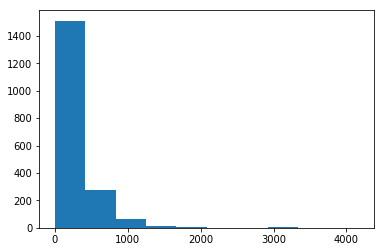

In [75]:
plt.hist(length)

In [76]:
length = sorted(length)
length

index = int(len(length)* 0.97) # 1171 cover 97% of words
max_length = length[index]
print(max_length)

987


In [77]:

padded_docs = pad_sequences(news_embbeding, maxlen=max_length, padding = 'post') 

# choose save the words which frequent greater than 50?
# padding: String, 'pre' or 'post': pad either before or after each sequence.

In [78]:
print(padded_docs[0:10])

[[ 946  392   49 ...    0    0    0]
 [ 535  197 2573 ...    0    0    0]
 [ 576   19  464 ...    0    0    0]
 ...
 [ 653 4087 1110 ...    0    0    0]
 [3827    3 1977 ...    0    0    0]
 [  66    5 1630 ...    0    0    0]]


In [79]:
len(padded_docs)

1883

# use glove to do word embedding

In [80]:
# load the whole embedding into memory
from numpy import array
from numpy import asarray
embeddings_index = dict()
file = "/Users/moranwang/Desktop/SummerQuarterDS/glove/glove.6B.50d.txt"
f = open(file)
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [81]:
'''
Next, we need to create a matrix of one embedding for each word in the training dataset. 
We can do that by enumerating all unique words in the Tokenizer.word_index and locating the embedding weight 
vector from the loaded GloVe embedding.
The result is a matrix of weights only for words we will see during training.
'''
vocab_size = len(t.word_index) + 1
from numpy import zeros
embedding_matrix = zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [82]:
print(len(t.word_index)) #  how many words in the entire words
print(type(t.word_index))

33893
<class 'dict'>


In [83]:
#print(t.word_index)

value = [v for key,v in t.word_index.items()]
value.count(1)

1

# using training data to train model

# split training , validation and testing data

In [107]:
print(len(padded_docs))
print(len(news_Y))


1883
1883


In [108]:
from sklearn.model_selection import train_test_split
validation_size = 0.2
seed = 3
# write your code  to complete following line

train_X, test_X = train_test_split(padded_docs,  test_size=validation_size, random_state=seed)
train_y, test_y = train_test_split(news_Y,  test_size=validation_size, random_state=seed)

In [110]:
#print(len(train_X[0]))
#print(len(train_X[1]))
print('the training x is', len(train_X))
print('the training y is', len(train_y))
print('the testing x is', len(test_X))
print('the testing y is', len(test_y))


print(train_y[0:20])
print(test_X[0:20])

the training x is 1506
the training y is 1506
the testing x is 377
the testing y is 377
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]
[[  207    17    18 ...     0     0     0]
 [  114    97   821 ...     0     0     0]
 [   11    44    28 ...     0     0     0]
 ...
 [  383  6740   383 ...     0     0     0]
 [  106  2305  2073 ...     0     0     0]
 [ 2348 10483  2320 ...     0     0     0]]


# How to use tensorflow to handle class imbalance?

# Model

In [111]:
model = Sequential()
# add embedding layers
model.add(Embedding(vocab_size, 50,weights=[embedding_matrix], input_length=max_length)) # length of dictionary, dim output

In [112]:
layer = model.layers[0]
    

In [113]:
layer.trainable = False

In [114]:
model.add(LSTM(40, input_shape =(None,50)))  # what is 20 means?  128 , 256, 512
model.add(Dense(1, activation='sigmoid'))
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'val_accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [115]:
# fit the model
model.fit(train_X, train_y, batch_size=1, validation_data= (test_X, test_y), epochs=50)
# evaluate the model
#loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)

Train on 1506 samples, validate on 377 samples
Epoch 1/50
 609/1506 [===========>..................] - ETA: 9:18 - loss: 0.3635 - acc: 0.8916

KeyboardInterrupt: 